In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\valer\AppData\Local\Temp\ipykernel_11896\3632437423.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('sale_tasks_dataset.csv')
df

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,state_talk_time_sec,wo_hit_status_result_desc,wo_hit_status_reason_desc,employee_id,emp_age,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd
0,422206773,58.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.0,"Дозвон, Отказ",Перезвонит самостоятельно позднее,142052.0,30,W,NaN,1,NaN,NaN
1,348648289,44.0,M,rural,0.0,0.0,0.0,0.0,1.0,1.0,...,151.0,"Дозвон, Отказ",Другое,7004.0,36,W,NaN,2,RUS,NaN
2,345496995,23.0,F,town,0.0,0.0,1.0,0.0,1.0,0.0,...,68.0,"Дозвон, Успешно",Назначена встреча,80760.0,52,W,NaN,6,NaN,NaN
3,182783192,34.0,M,town,0.0,0.0,0.0,0.0,0.0,0.0,...,738.0,"Дозвон, Успешно",Обещал утилизироваться самостоятельно,158672.0,22,NaN,NaN,8,NaN,NaN
4,138498254,30.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.0,"Дозвон, Отказ",Переведен в банк,14462.0,51,W,NaN,7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18686,365712573,49.0,F,urban,0.0,1.0,0.0,0.0,1.0,3.0,...,101.0,"Дозвон, Отказ",Не устраивает одобренная сумма,191799.0,47,W,NaN,2,NaN,NaN
18687,305526568,58.0,F,msk,0.0,0.0,0.0,0.0,0.0,0.0,...,75.0,"Дозвон, Отказ",Кредитная карта не нужна,265923.0,53,W,NaN,6,NaN,NaN
18688,77876991,47.0,M,urban,0.0,1.0,1.0,1.0,1.0,1.0,...,59.0,"Дозвон, Отказ",Кредит уже не нужен,215719.0,29,M,NaN,4,NaN,NaN
18689,321508947,41.0,M,town,0.0,0.0,1.0,0.0,1.0,1.0,...,NaN,"Дозвон, Отказ",Вопросы по оплаченному полису,97765.0,39,W,NaN,0,NaN,NaN


In [3]:
df['wo_hit_status_result_desc'].value_counts()

wo_hit_status_result_desc
Дозвон, Отказ      16274
Дозвон, Успешно     2417
Name: count, dtype: int64

In [38]:
# Добаление признака-флага успеха(1) и отказа(0)
df['flag_call_result'] = df['wo_hit_status_result_desc'].apply(lambda x: 1 if 'Успешно' in x else 0)

C:\Users\valer\AppData\Local\Temp\ipykernel_23736\3487227303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag_call_result'] = df['wo_hit_status_result_desc'].apply(lambda x: 1 if 'Успешно' in x else 0)


In [86]:
conditions = [
    (df['age'] >= 18) & (df['age'] <= 29),  
    (df['age'] >= 30) & (df['age'] <= 42), 
    (df['age'] > 42) & (df['age'] <= 60)
]

# Определение значений для категорий
values = [0, 1, 2]

# Создание нового столбца 'Возрастная категория'
df['age_cat'] = pd.cut(df['age'], bins=[17, 29, 42, 60], labels=['18-29', '30-42', '42-60'], right=True)

C:\Users\valer\AppData\Local\Temp\ipykernel_7268\471439450.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['age_cat', 'flag_call_result']).size().unstack(fill_value=0)


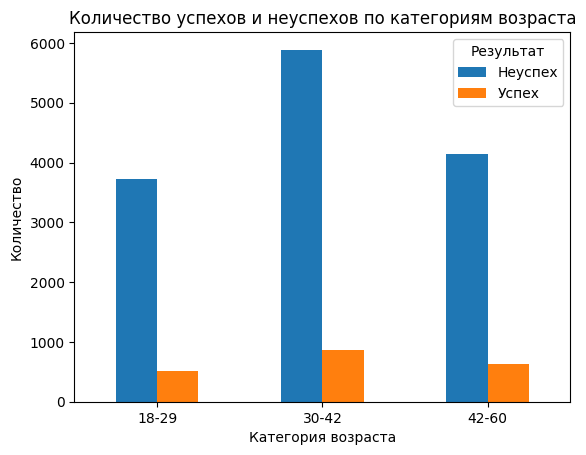

In [74]:
grouped = df.groupby(['age_cat', 'flag_call_result']).size().unstack(fill_value=0)

grouped.columns = ['Неуспех', 'Успех']

grouped.plot(kind='bar', stacked=False)


plt.title('Количество успехов и неуспехов по категориям возраста')
plt.xlabel('Категория возраста')
plt.ylabel('Количество')
plt.xticks(rotation=0)

plt.legend(title='Результат', labels=['Неуспех', 'Успех'])
plt.show()

In [75]:
translations = {
    "Preapprove": "предодобренные заявки",
    "Cold": "холодная продажа",
    "Afterfilling": "дозаполнение заявки",
    "Utilization": "утилизация",
    "Agreement": "согласие",
    "Meeting": "встреча",
    "Upsell": "продажа более дорого и тяжёлого продукта",
    "Reutilization": "повторная утилизация",
    "Incoming": "входящий звонок",
    "Downsell": "продажа более дешёвого и легкого продукта",
    "Activation": "активация продукта",
    "Personal accident Insurance": "личное страхование от несчастных случаев",
    "Verification": "верификация каких-либо данных",
    "Autoleads": "автоследование",
    "BAF": "«Приведи друга»",
    "Prolongation": "пролонгация (продление договора)",
    "Deposit": "депозит",
    "Refinancing": "рефинансирование"
}

C:\Users\valer\AppData\Local\Temp\ipykernel_7268\3671601551.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['age_cat', 'functional_cd', 'flag_call_result']).size().unstack(fill_value=0)


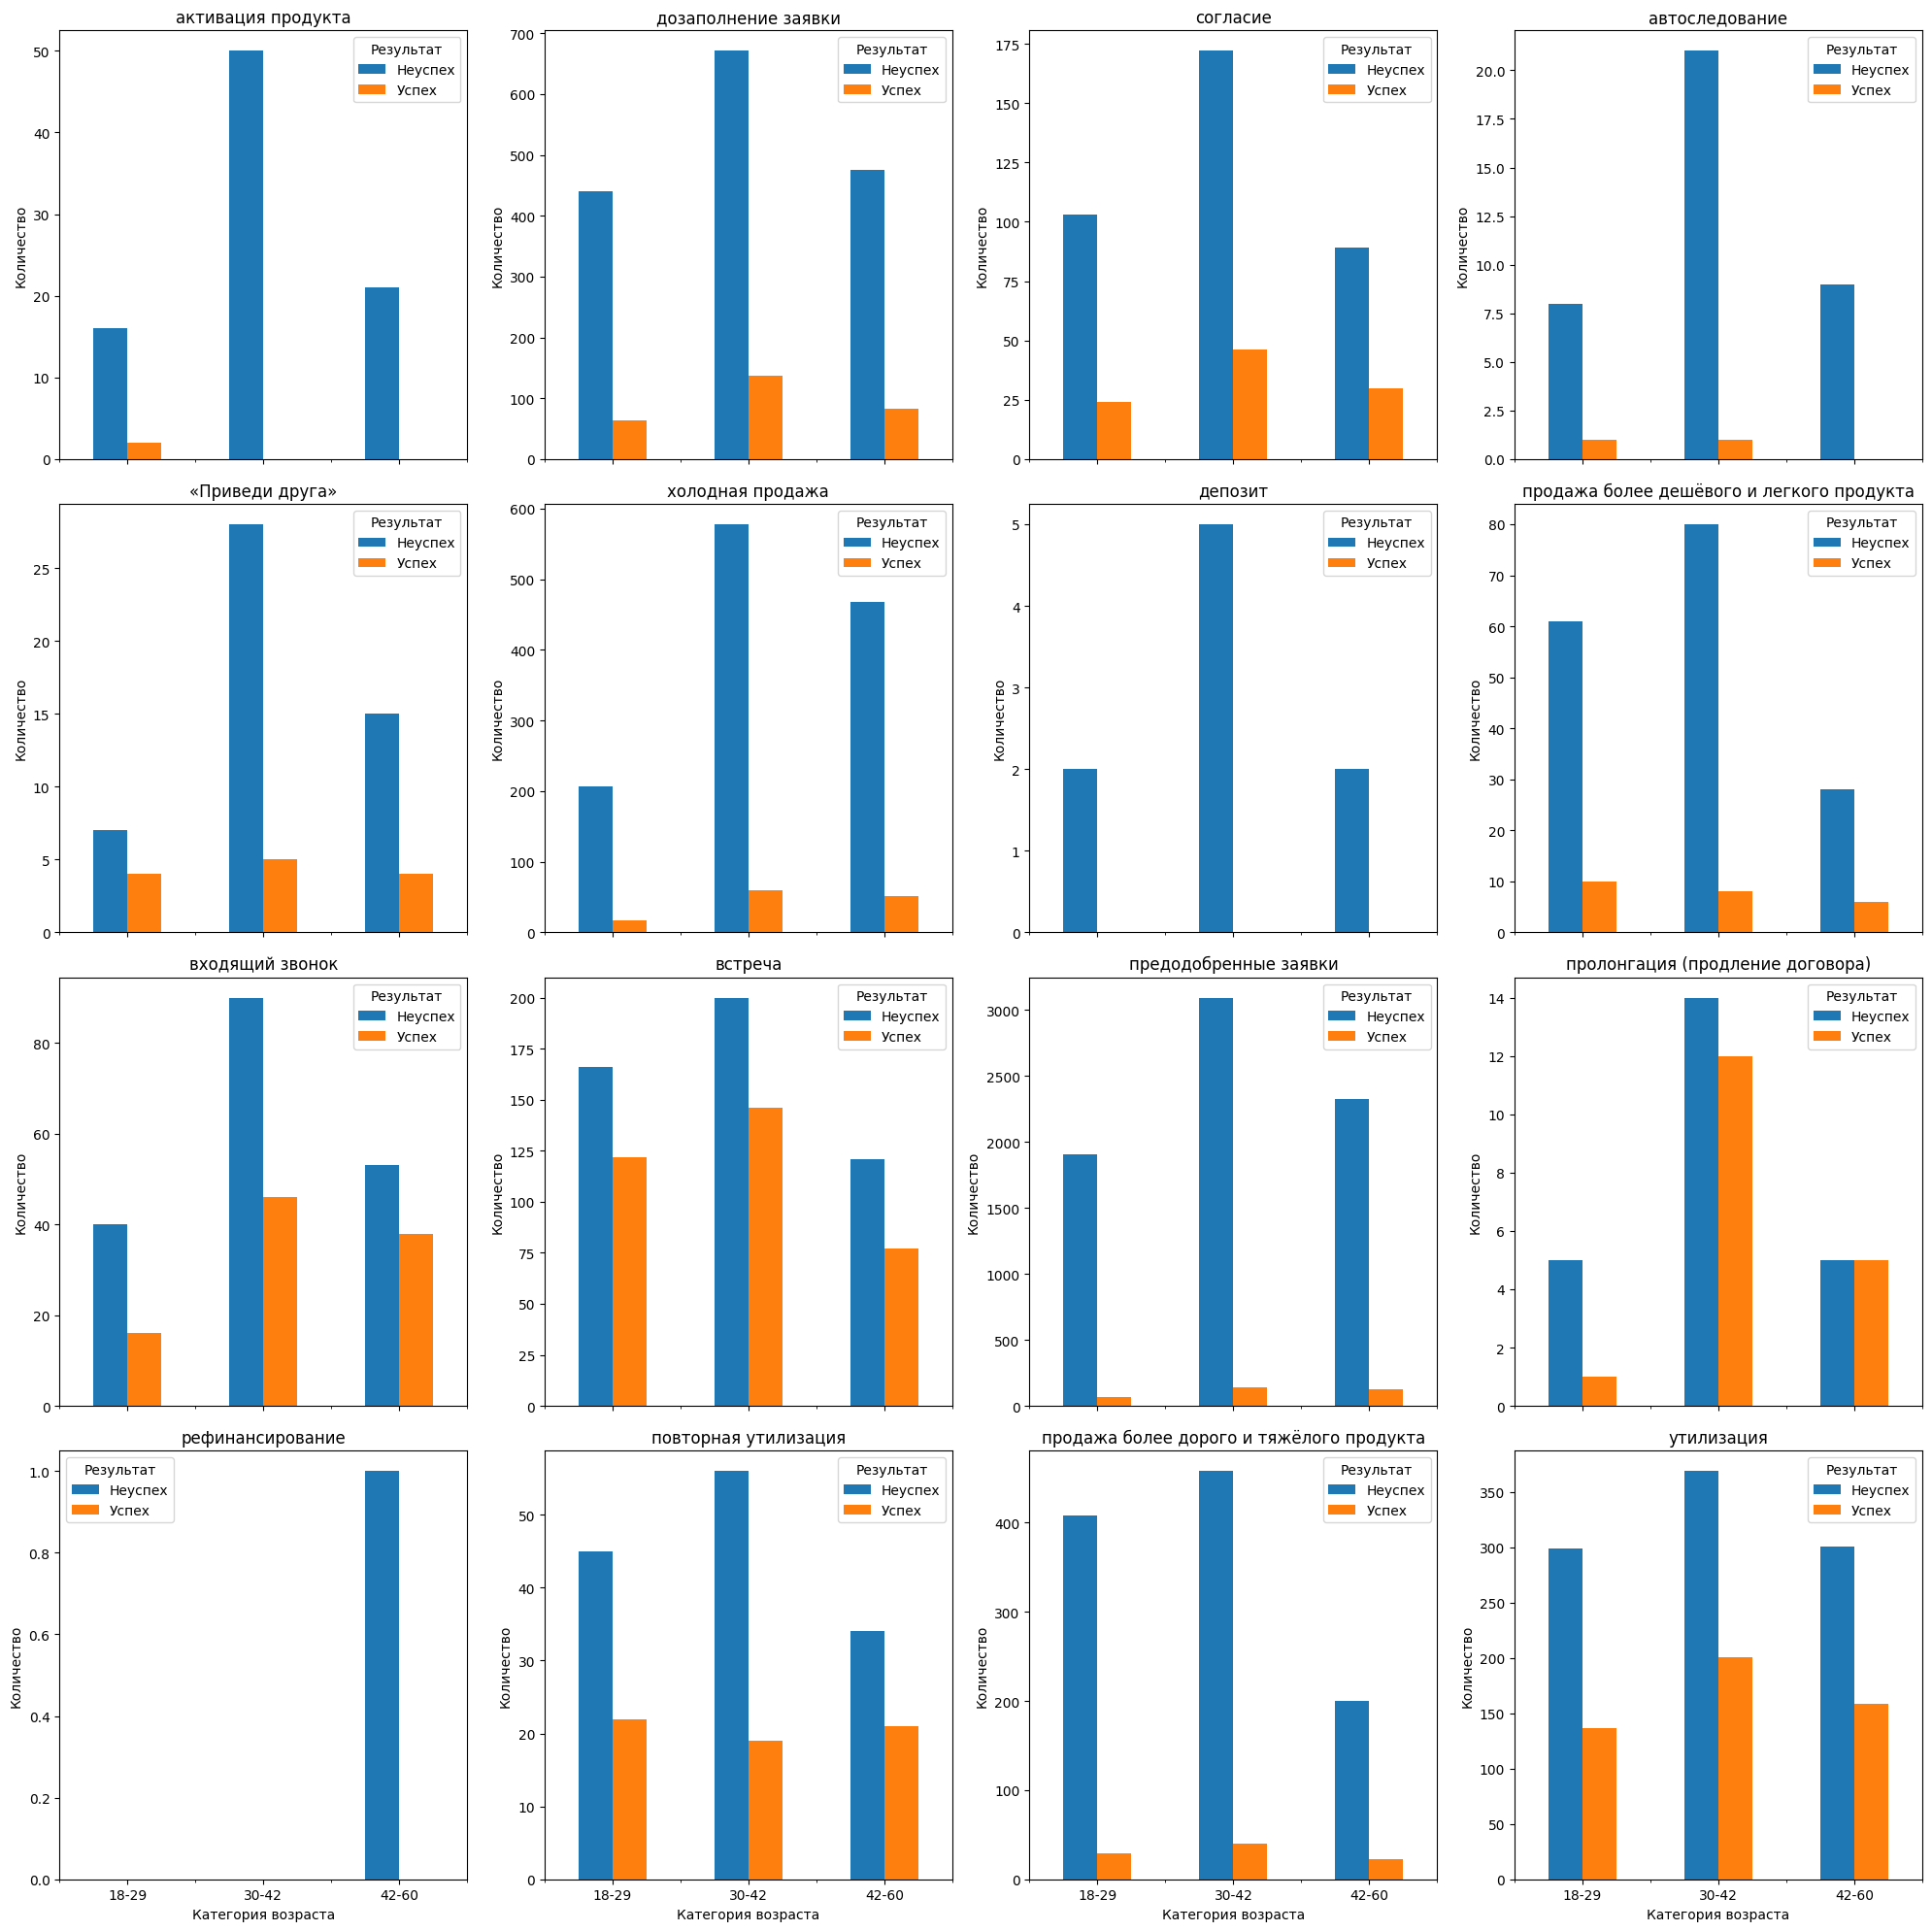

In [76]:
grouped = df.groupby(['age_cat', 'functional_cd', 'flag_call_result']).size().unstack(fill_value=0)

grouped.columns = ['Неуспех', 'Успех']

num_graphs = len(grouped.index.levels[1])
ncols = 4
nrows = (num_graphs + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 5), sharex=True)

axes = axes.flatten()

for i, functional_cd in enumerate(grouped.index.levels[1]):
    ax = axes[i]
    data_to_plot = grouped.xs(functional_cd, level='functional_cd')
    data_to_plot.plot(kind='bar', ax=ax)
    ax.set_title(translations[functional_cd])
    ax.set_ylabel('Количество')
    ax.set_xlabel('Категория возраста')
    ax.legend(title='Результат', labels=['Неуспех', 'Успех'])
    ax.set_xticks(range(len(data_to_plot)))
    ax.set_xticklabels(data_to_plot.index, rotation=0)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


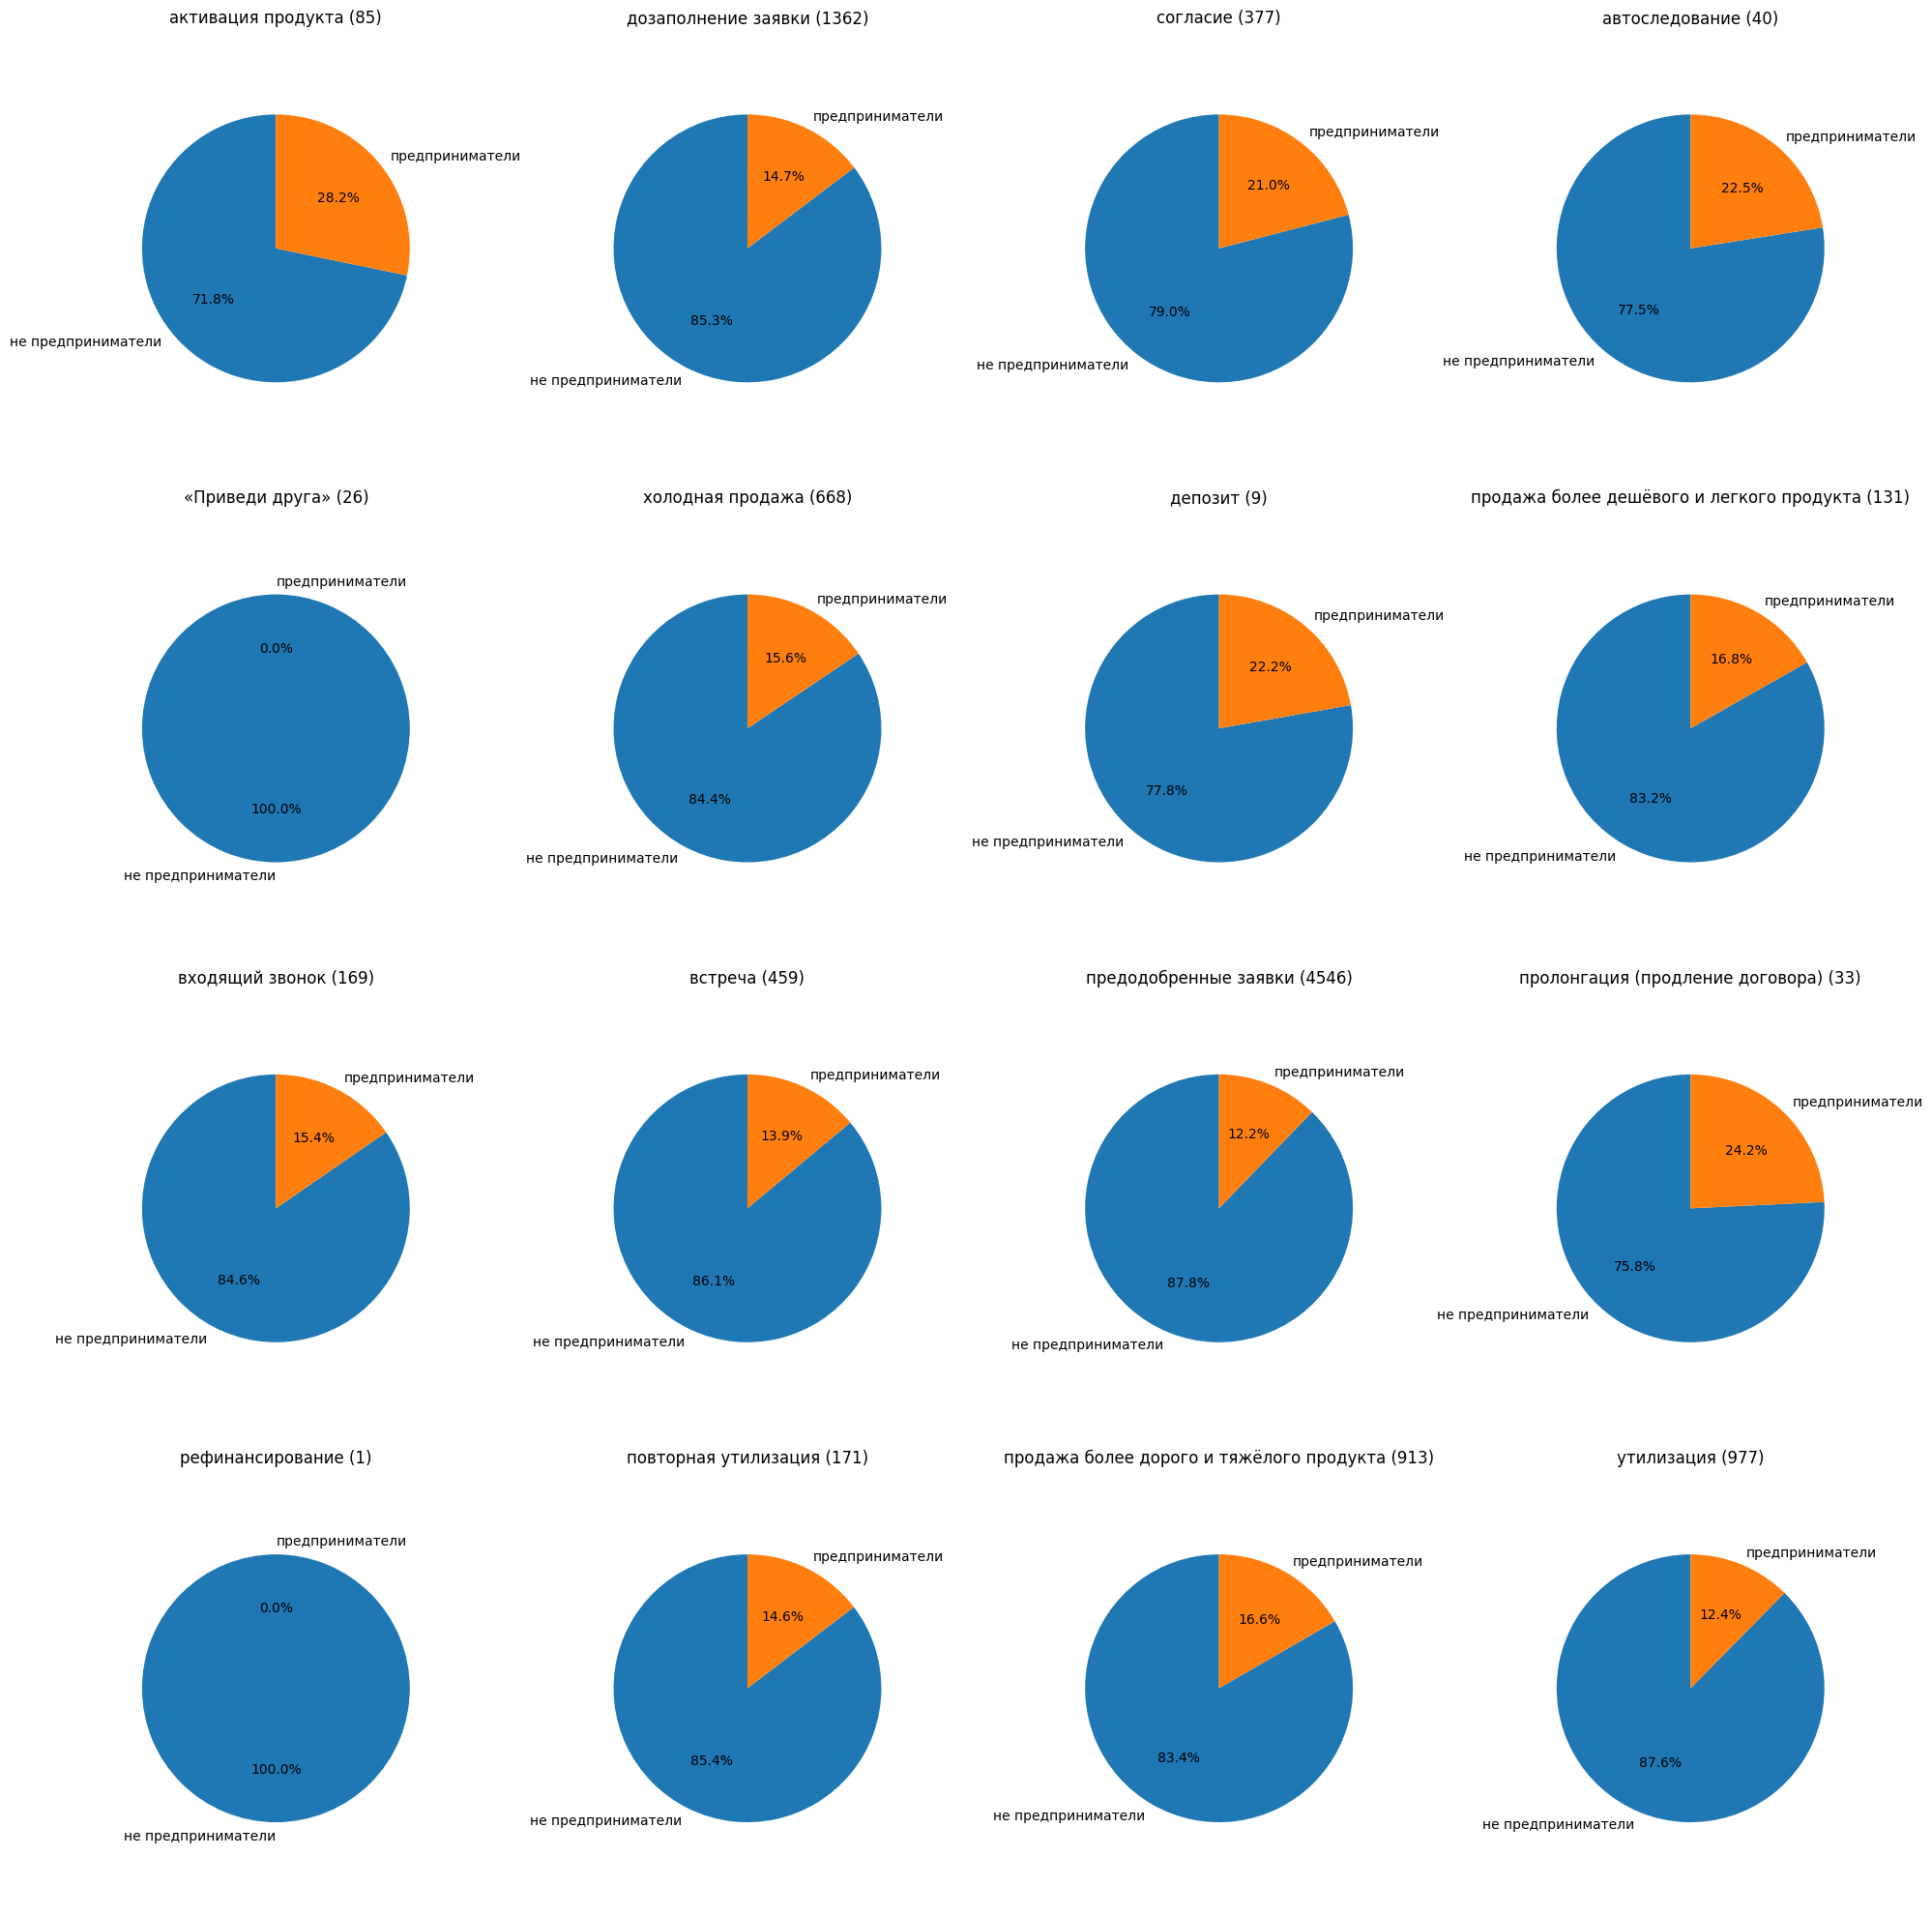

In [78]:
gender_counts = df.groupby(['functional_cd', 'entrepreneur_flg']).size().unstack(fill_value=0)

num_plots = len(gender_counts)
cols = 4 
rows = (num_plots + cols - 1) // cols 

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))
axes = axes.flatten()  

labels = ['не предприниматели', 'предприниматели']

for i, functional in enumerate(gender_counts.index):
    total_count = gender_counts.loc[functional].sum()  
    axes[i].pie(gender_counts.loc[functional], autopct='%1.1f%%', startangle=90, labels=labels)
    axes[i].set_title(f"{translations[functional]} ({total_count})")
    axes[i].axis('equal')  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.savefig('pred.png')
plt.tight_layout() 
plt.show()


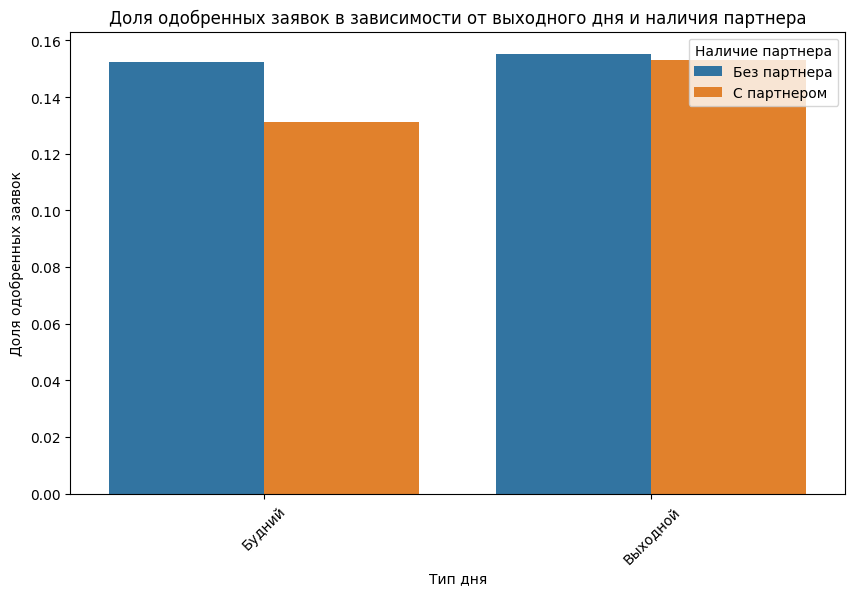

In [35]:
grouped = df.groupby(['is_holiday', 'partnership_flg', 'flag_call_result']).size().unstack(fill_value=0)

grouped['total'] = grouped.sum(axis=1)

grouped['approved_ratio'] = grouped[1] / grouped['total']

grouped.reset_index(inplace=True)


grouped['is_holiday'] = grouped['is_holiday'].replace({1: 'Выходной', 0: 'Будний'})
grouped['partnership_flg'] = grouped['partnership_flg'].replace({1: 'С партнером', 0: 'Без партнера'})

plt.figure(figsize=(10, 6))
sns.barplot(x='is_holiday', y='approved_ratio', hue='partnership_flg', data=grouped)
plt.title('Доля одобренных заявок в зависимости от выходного дня и наличия партнера')
plt.xlabel('Тип дня')
plt.ylabel('Доля одобренных заявок')
plt.xticks(rotation=45)
plt.legend(title='Наличие партнера')
plt.show()
plt.show()

TypeError: 'numpy.float64' object cannot be interpreted as an integer

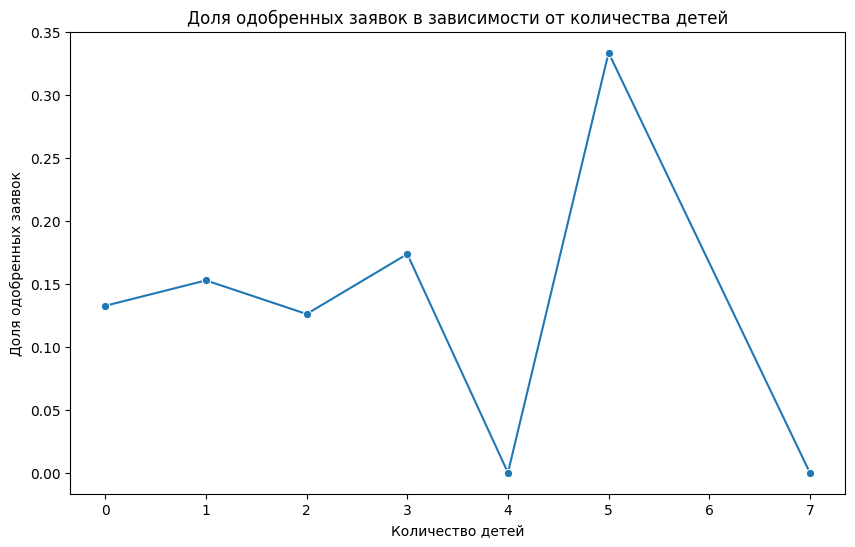

In [36]:
grouped = df.groupby('child_amt').agg(
    total=('flag_call_result', 'size'),
    approved=('flag_call_result', lambda x: (x == 1).sum())
).reset_index()

grouped['approved_ratio'] = grouped['approved'] / grouped['total']

plt.figure(figsize=(10, 6))
sns.lineplot(x='child_amt', y='approved_ratio', data=grouped, marker='o')
plt.title('Доля одобренных заявок в зависимости от количества детей')
plt.xlabel('Количество детей')
plt.ylabel('Доля одобренных заявок')
plt.xticks(range(grouped['child_amt'].min(), grouped['child_amt'].max() + 1))
plt.grid()
plt.show()

In [37]:
grouped

,child_amt,total,approved,approved_ratio
0,0.0,6950,921,0.132518
1,1.0,2352,359,0.152636
2,2.0,524,66,0.125954
3,3.0,121,21,0.173554
4,4.0,13,0,0.000000
5,5.0,6,2,0.333333
6,7.0,1,0,0.000000


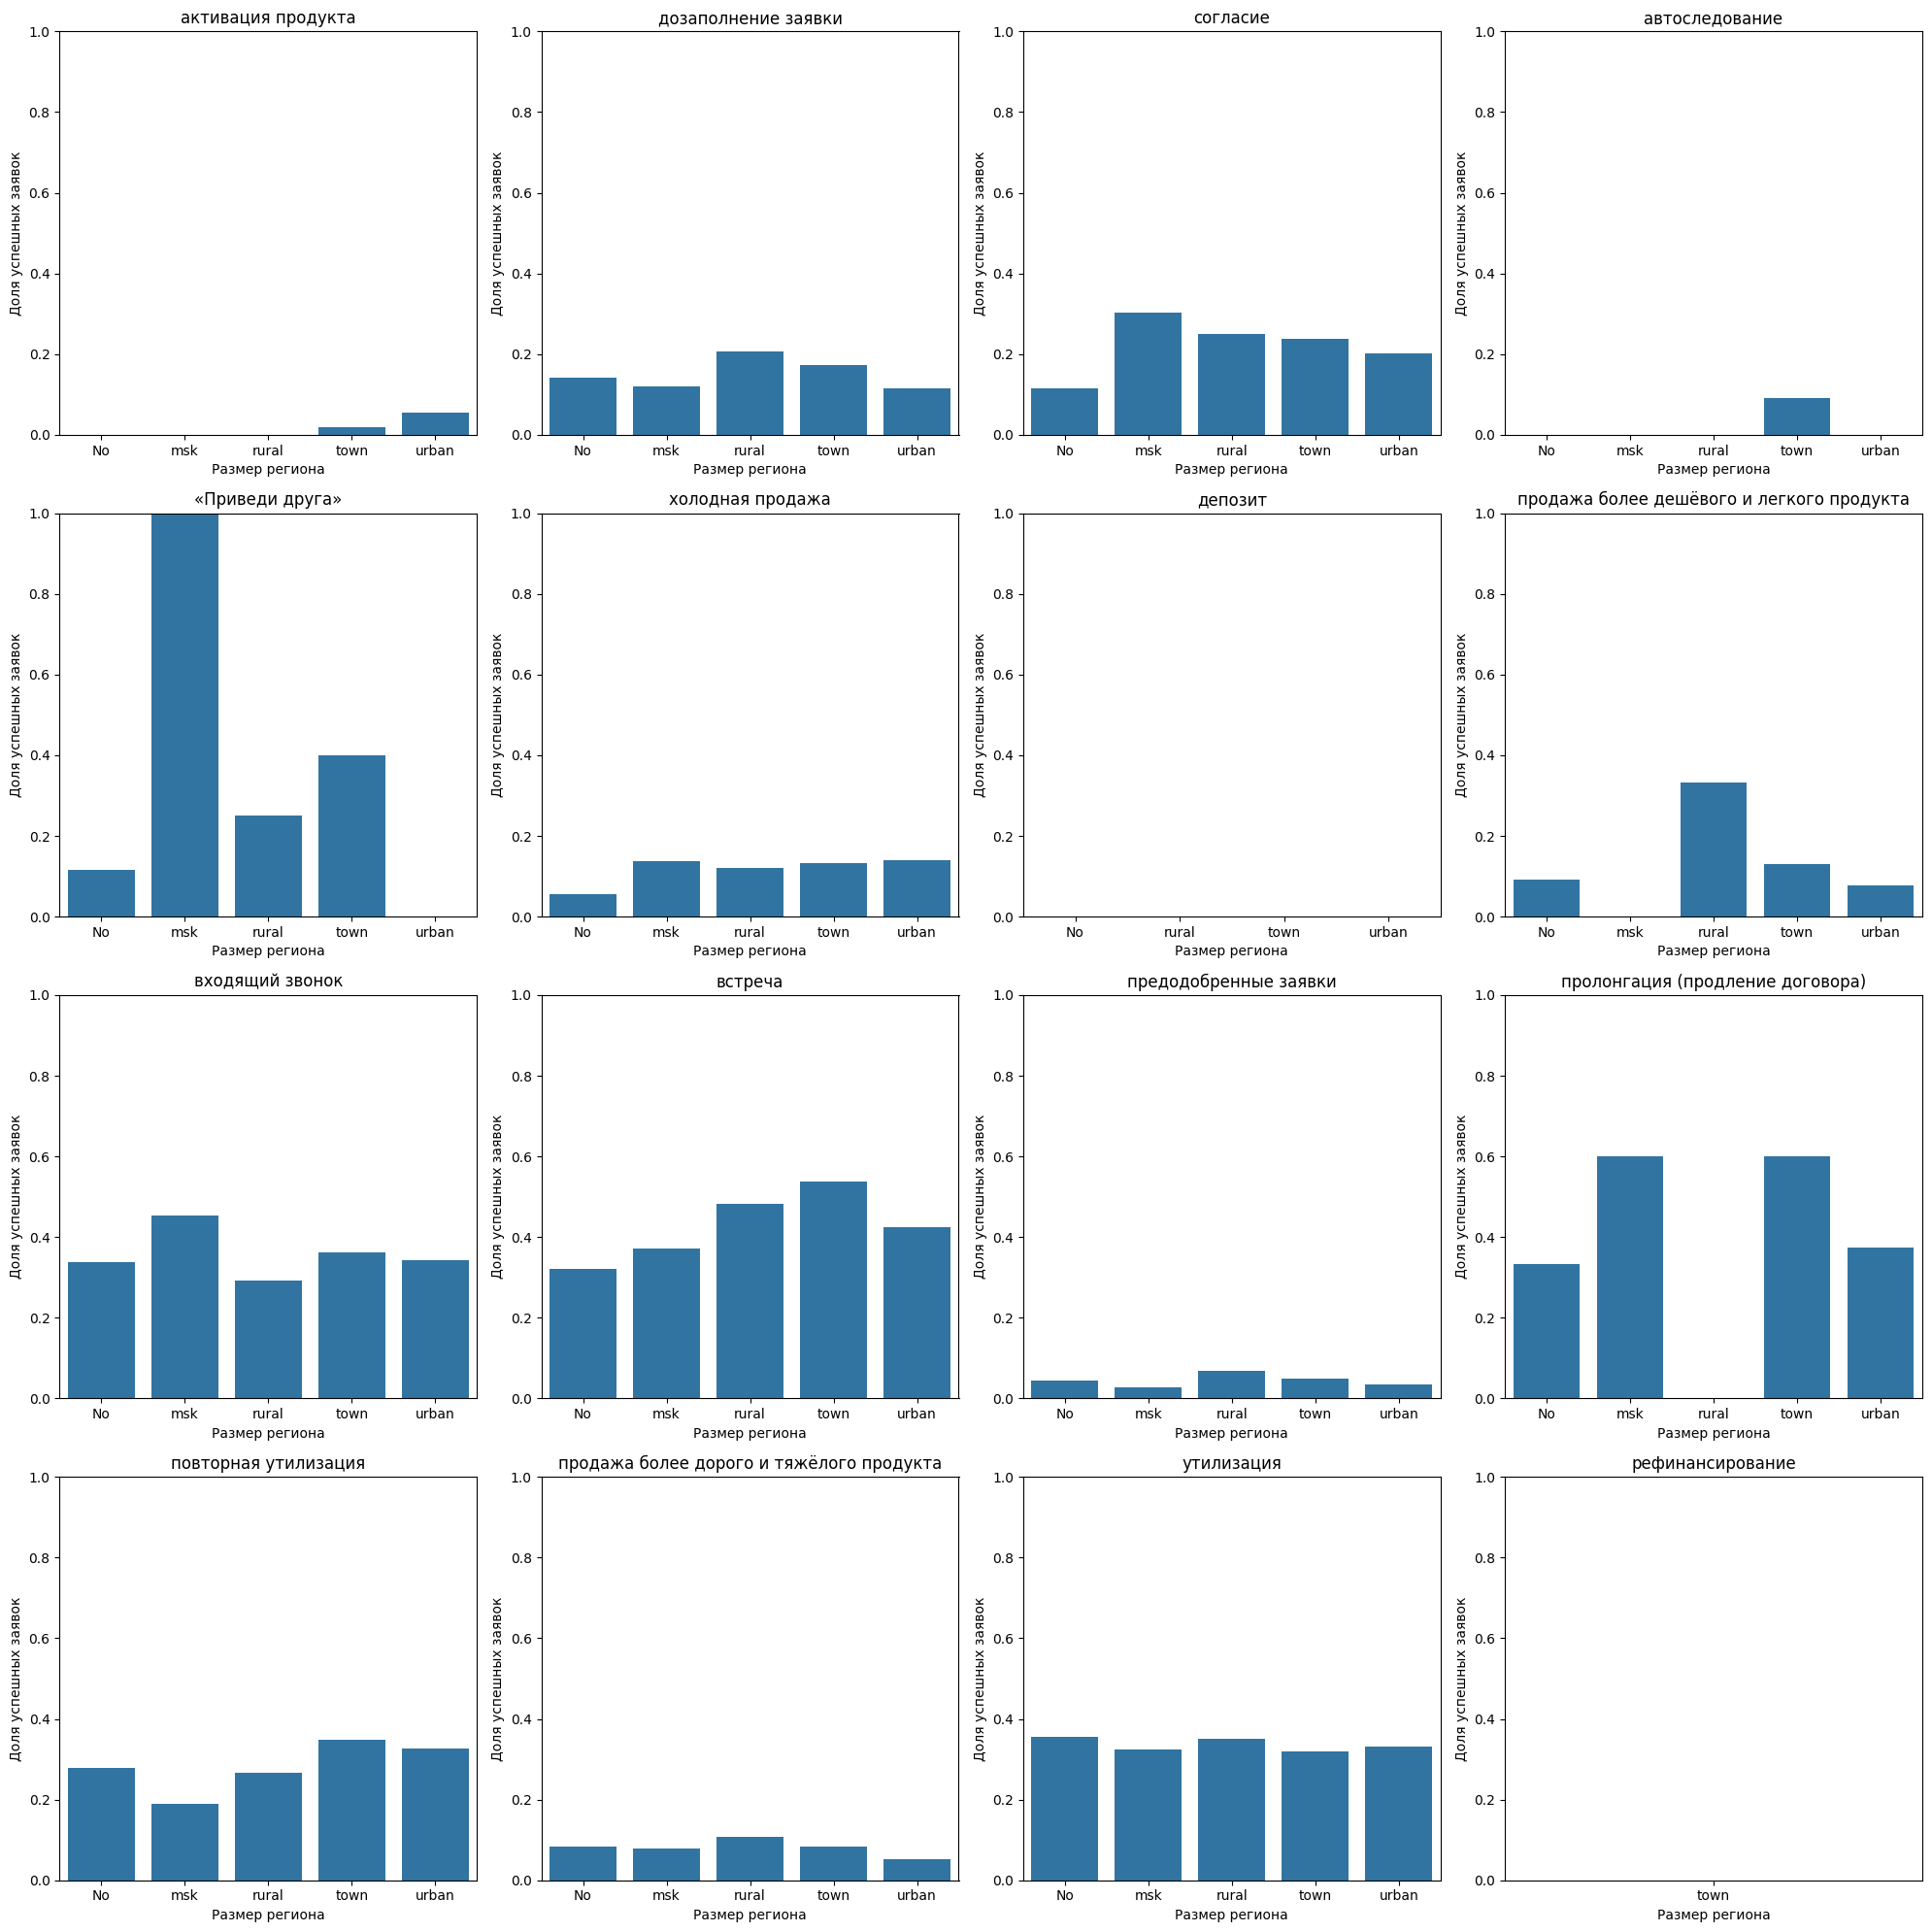

In [38]:
grouped = df.groupby(['region_size', 'functional_cd']).agg(
    total=('flag_call_result', 'size'),
    approved=('flag_call_result', lambda x: (x == 1).sum())
).reset_index()

grouped['approved_ratio'] = grouped['approved'] / grouped['total']
functional_codes = grouped['functional_cd'].unique()


num_plots = len(functional_codes)
cols = 4
rows = (num_plots + cols - 1) // cols

plt.figure(figsize=(20, rows * 5))


for i, functional_code in enumerate(functional_codes):
    plt.subplot(rows, cols, i + 1)
    
    data_subset = grouped[grouped['functional_cd'] == functional_code]
    
    sns.barplot(x='region_size', y='approved_ratio', data=data_subset)
    
    plt.title(translations[functional_code])
    plt.xlabel('Размер региона')
    plt.ylabel('Доля успешных заявок')
    plt.ylim(0, 1) 

plt.tight_layout()
plt.show()

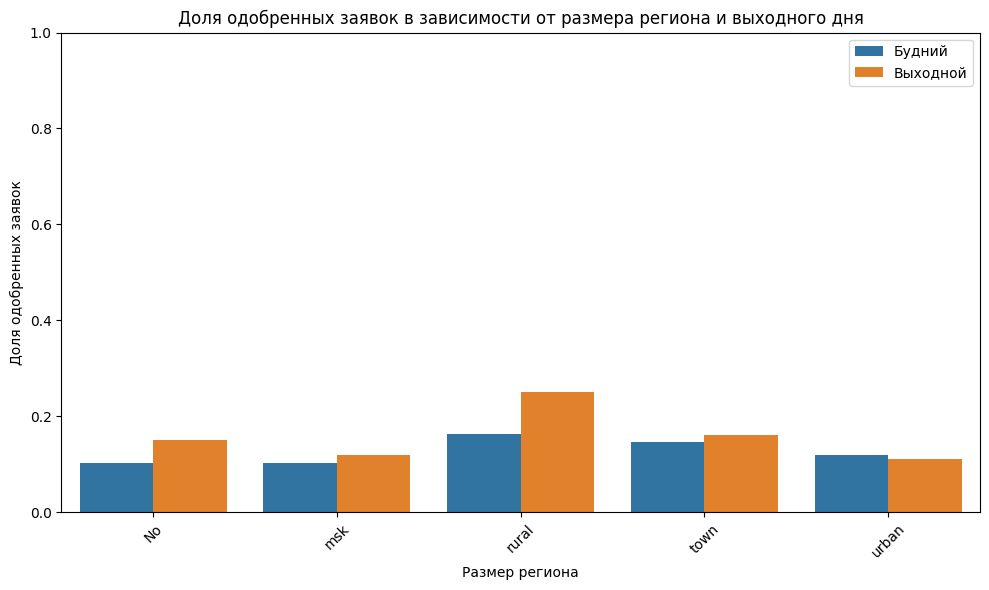

In [39]:
grouped = df.groupby(['region_size', 'is_holiday']).agg(
    total=('flag_call_result', 'size'),
    approved=('flag_call_result', lambda x: (x == 1).sum())
).reset_index()

grouped['approved_ratio'] = grouped['approved'] / grouped['total']
grouped['is_holiday'] = grouped['is_holiday'].replace({1: 'Выходной', 0: 'Будний'})

plt.figure(figsize=(10, 6))

sns.barplot(x='region_size', y='approved_ratio', hue='is_holiday', data=grouped)

plt.title('Доля одобренных заявок в зависимости от размера региона и выходного дня')
plt.xlabel('Размер региона')
plt.ylabel('Доля одобренных заявок')
plt.ylim(0, 1)
plt.xticks(rotation=45)

plt.legend()

plt.tight_layout()
plt.show()

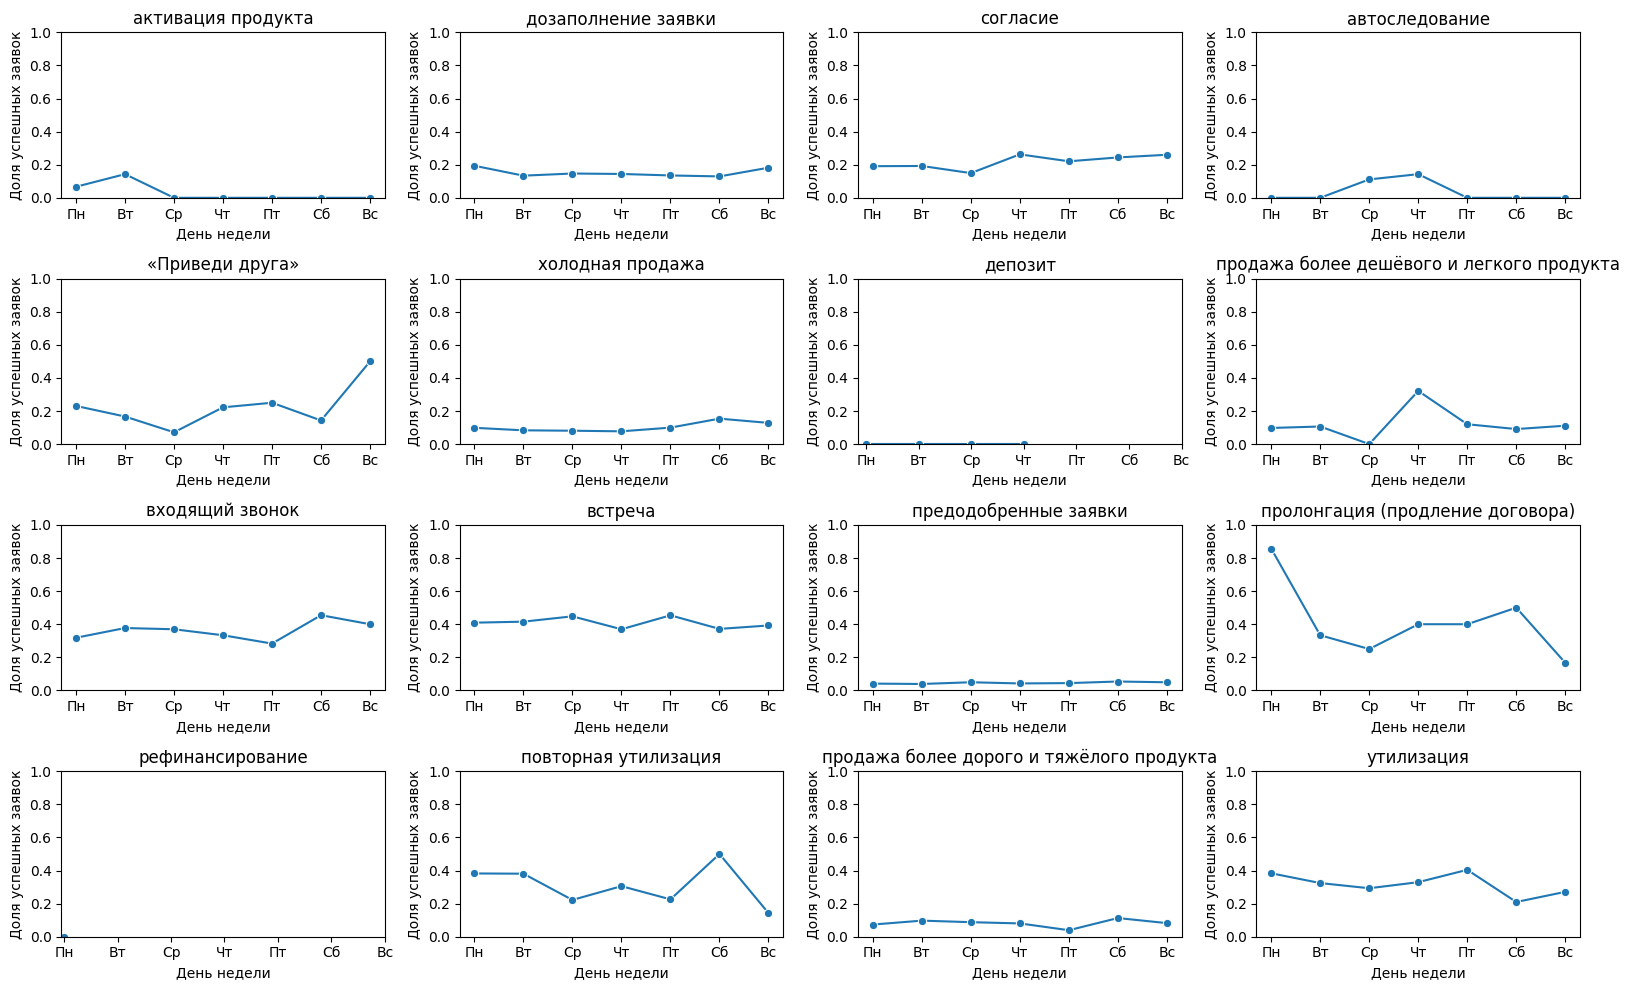

In [40]:
grouped = df.groupby(['day_of_week', 'functional_cd']).agg(
    total=('flag_call_result', 'size'),
    approved=('flag_call_result', lambda x: (x == 1).sum())
).reset_index()

grouped['approved_ratio'] = grouped['approved'] / grouped['total']

functional_codes = grouped['functional_cd'].unique()

plt.figure(figsize=(16, 10))

num_plots = len(functional_codes)
cols = 4
rows = (num_plots + cols - 1) // cols

for i, functional_code in enumerate(functional_codes):
    plt.subplot(rows, cols, i + 1)
    
    subset = grouped[grouped['functional_cd'] == functional_code]
    
    sns.lineplot(x='day_of_week', y='approved_ratio', data=subset, marker='o')
    
    plt.title(translations[functional_code])
    plt.xlabel('День недели')
    plt.ylabel('Доля успешных заявок')
    plt.xticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

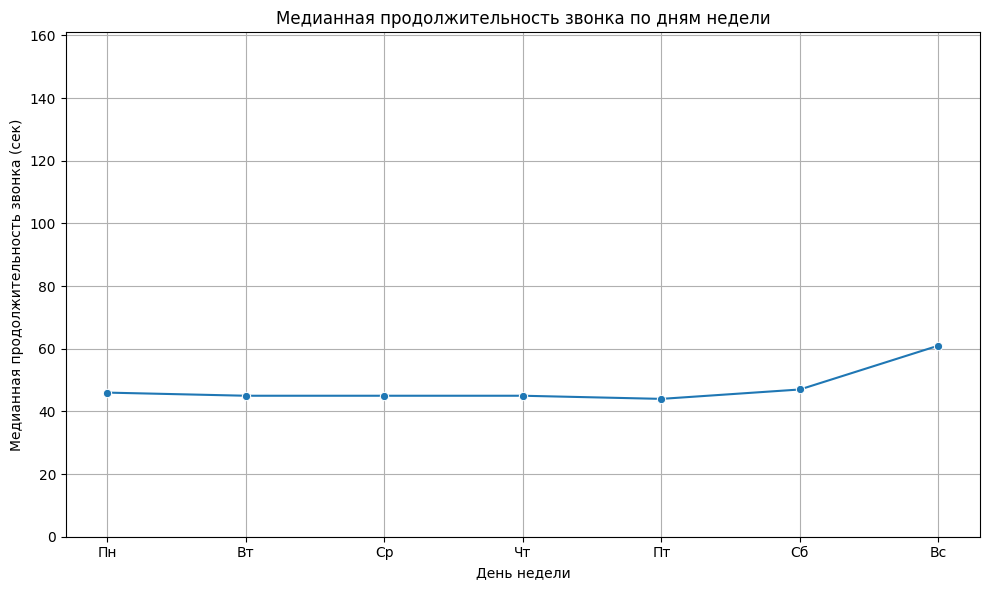

In [41]:
median_talk_time = df.groupby('day_of_week')['state_talk_time_sec'].median().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='day_of_week', y='state_talk_time_sec', data=median_talk_time, marker='o')

plt.title('Медианная продолжительность звонка по дням недели')
plt.xlabel('День недели')
plt.ylabel('Медианная продолжительность звонка (сек)')
plt.xticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.ylim(0, median_talk_time['state_talk_time_sec'].max() + 100)

plt.grid()
plt.tight_layout()
plt.show()

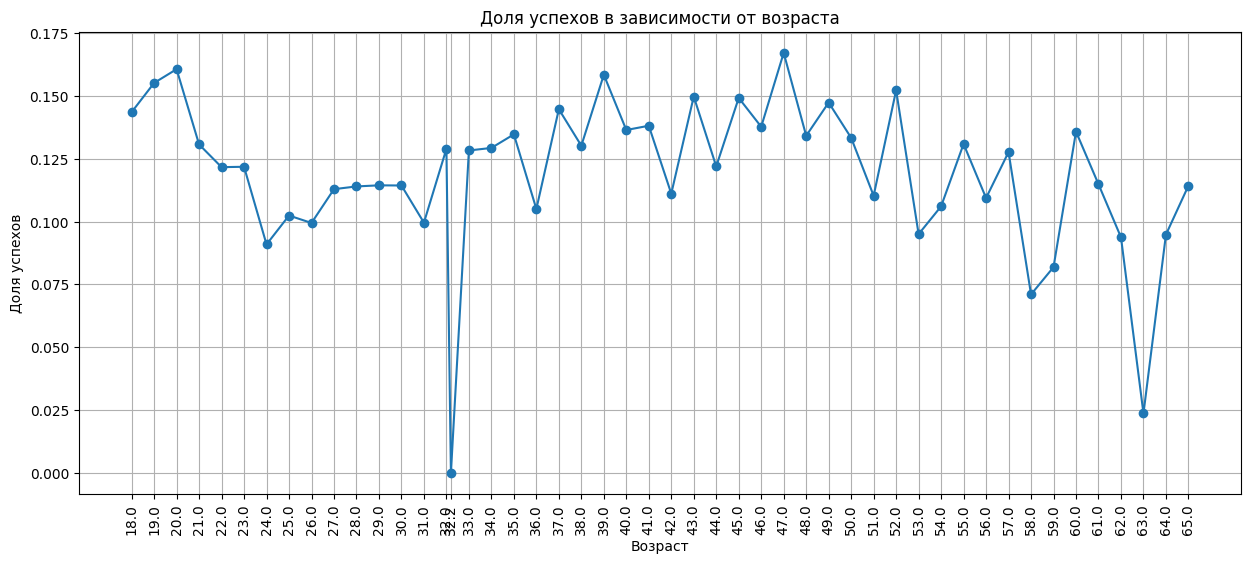

In [42]:
success_rate = df.groupby('age')['flag_call_result'].mean().reset_index()

success_rate.columns = ['age', 'success_rate']

plt.figure(figsize=(15, 6))
plt.plot(success_rate['age'], success_rate['success_rate'], marker='o')
plt.title('Доля успехов в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Доля успехов')
plt.xticks(success_rate['age'], rotation=90)
plt.grid()
plt.show()

C:\Users\valer\AppData\Local\Temp\ipykernel_7268\2913201347.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_rate = df.groupby('age_cat')['flag_call_result'].mean().reset_index()


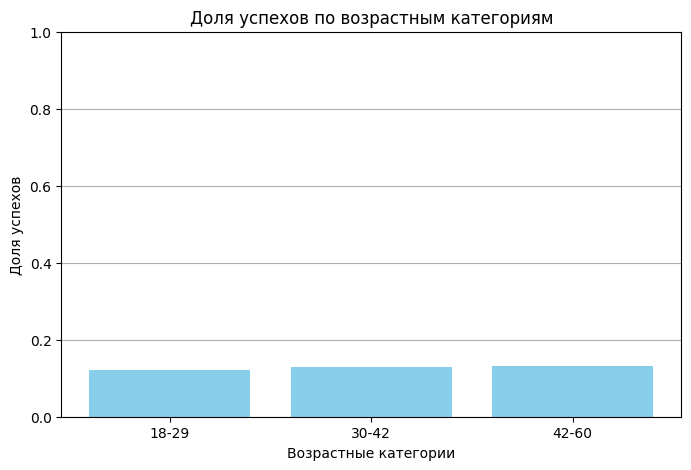

In [43]:
success_rate = df.groupby('age_cat')['flag_call_result'].mean().reset_index()

success_rate.columns = ['age_cat', 'success_rate']

plt.figure(figsize=(8, 5))
plt.bar(success_rate['age_cat'], success_rate['success_rate'], color='skyblue')
plt.title('Доля успехов по возрастным категориям')
plt.xlabel('Возрастные категории')
plt.ylabel('Доля успехов')
plt.ylim(0, 1) 
plt.grid(axis='y')
plt.show()

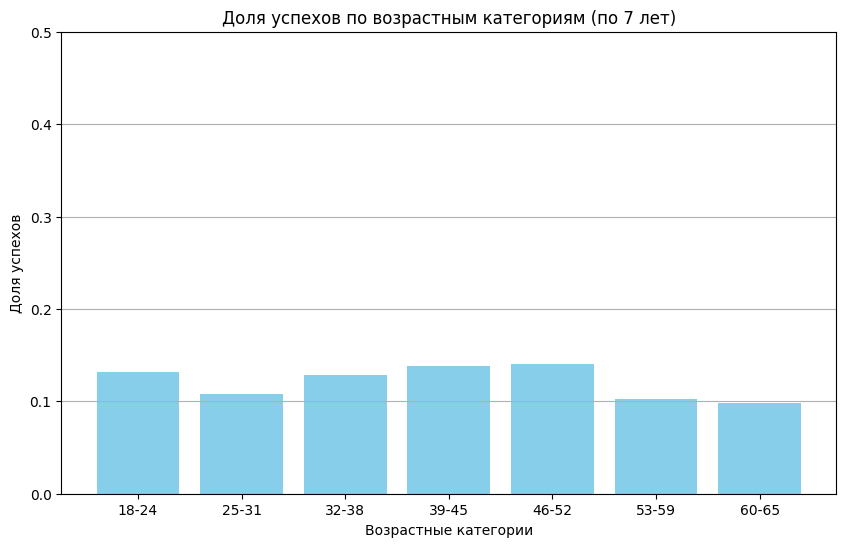

In [64]:
def age_category(age):
    if age < 25:
        return '18-24'
    elif age < 32:
        return '25-31'
    elif age < 39:
        return '32-38'
    elif age < 46:
        return '39-45'
    elif age < 53:
        return '46-52'
    elif age < 60:
        return '53-59'
    else:
        return '60-65'

df['age_cat'] = df['age'].apply(age_category)


success_rate = df.groupby('age_cat')['flag_call_result'].mean().reset_index()

success_rate.columns = ['age_cat', 'success_rate']

plt.figure(figsize=(10, 6))
plt.bar(success_rate['age_cat'], success_rate['success_rate'], color='skyblue')
plt.title('Доля успехов по возрастным категориям (по 7 лет)')
plt.xlabel('Возрастные категории')
plt.ylabel('Доля успехов')
plt.ylim(0, 0.5)  
plt.grid(axis='y')
plt.show()

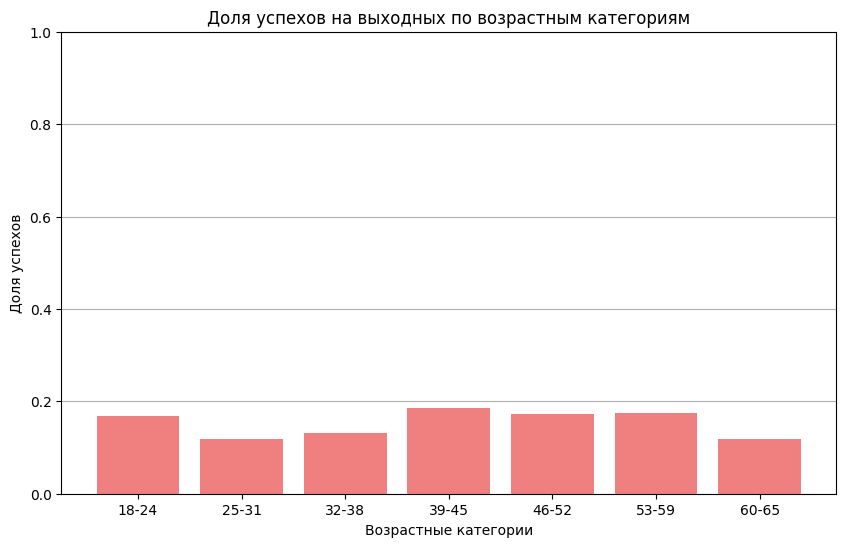

In [45]:
weekend_data = df[df['is_holiday'] == 1]

success_rate_weekend = weekend_data.groupby('age_cat')['flag_call_result'].mean().reset_index()

success_rate_weekend.columns = ['age_cat', 'success_rate']

plt.figure(figsize=(10, 6))
plt.bar(success_rate_weekend['age_cat'], success_rate_weekend['success_rate'], color='lightcoral')
plt.title('Доля успехов на выходных по возрастным категориям')
plt.xlabel('Возрастные категории')
plt.ylabel('Доля успехов')
plt.ylim(0, 1) 
plt.grid(axis='y')
plt.show()

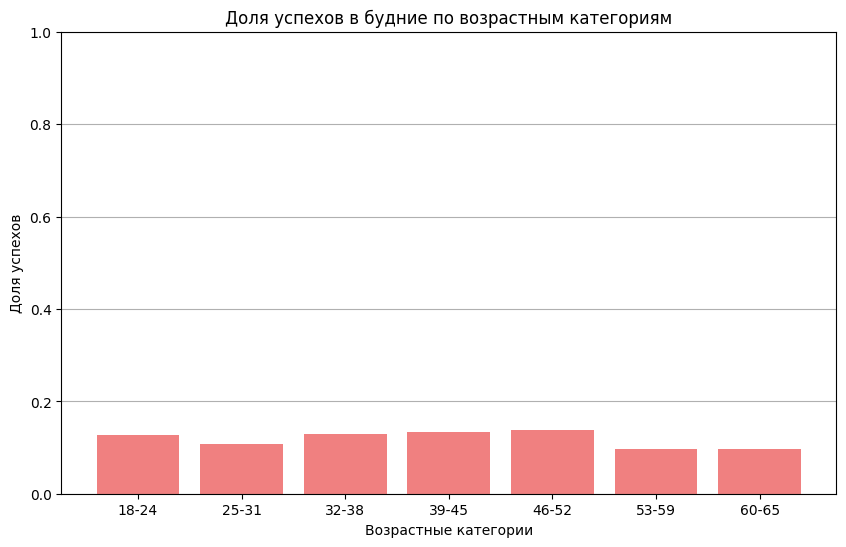

In [46]:
weekend_data = df[df['is_holiday'] == 0]

success_rate_weekend = weekend_data.groupby('age_cat')['flag_call_result'].mean().reset_index()

success_rate_weekend.columns = ['age_cat', 'success_rate']

plt.figure(figsize=(10, 6))
plt.bar(success_rate_weekend['age_cat'], success_rate_weekend['success_rate'], color='lightcoral')
plt.title('Доля успехов в будние по возрастным категориям')
plt.xlabel('Возрастные категории')
plt.ylabel('Доля успехов')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

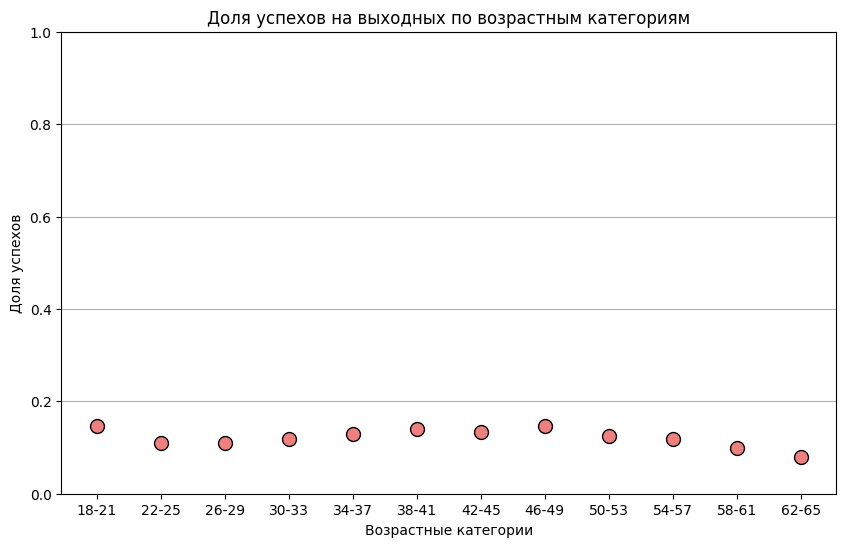

In [47]:
def age_category(age):
    if age < 22:
        return '18-21'
    elif age < 26:
        return '22-25'
    elif age < 30:
        return '26-29'
    elif age < 34:
        return '30-33'
    elif age < 38:
        return '34-37'
    elif age < 42:
        return '38-41'
    elif age < 46:
        return '42-45'
    elif age < 50:
        return '46-49'
    elif age < 54:
        return '50-53'
    elif age < 58:
        return '54-57'
    elif age < 62:
        return '58-61'
    else:
        return '62-65'
    
df['age_cat'] = df['age'].apply(age_category)


weekend_data = df


success_rate_weekend = weekend_data.groupby('age_cat')['flag_call_result'].mean().reset_index()

success_rate_weekend.columns = ['age_cat', 'success_rate']


plt.figure(figsize=(10, 6))
plt.scatter(success_rate_weekend['age_cat'], success_rate_weekend['success_rate'], s=100, color='lightcoral', edgecolor='black')
plt.title('Доля успехов на выходных по возрастным категориям')
plt.xlabel('Возрастные категории')
plt.ylabel('Доля успехов')
plt.ylim(0, 1) 
plt.grid(axis='y')
plt.show()

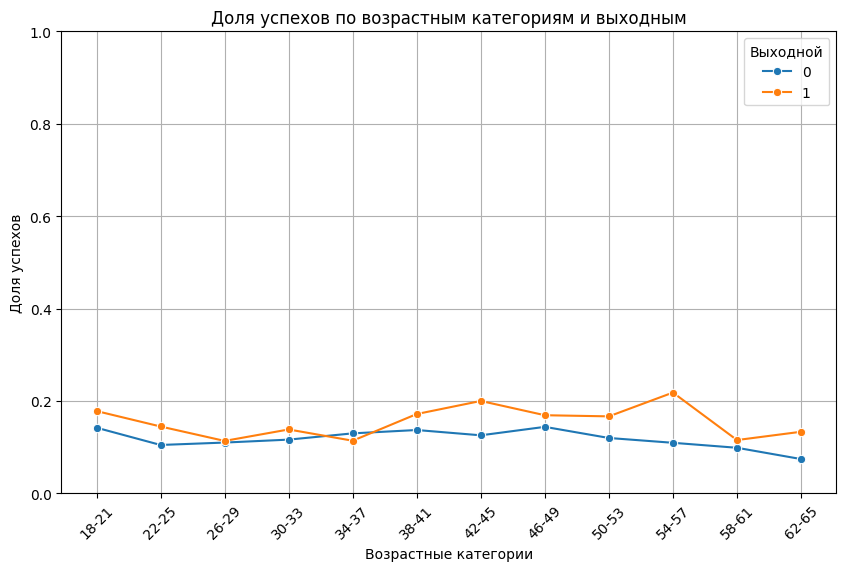

In [48]:
def age_category(age):
    if age < 22:
        return '18-21'
    elif age < 26:
        return '22-25'
    elif age < 30:
        return '26-29'
    elif age < 34:
        return '30-33'
    elif age < 38:
        return '34-37'
    elif age < 42:
        return '38-41'
    elif age < 46:
        return '42-45'
    elif age < 50:
        return '46-49'
    elif age < 54:
        return '50-53'
    elif age < 58:
        return '54-57'
    elif age < 62:
        return '58-61'
    else:
        return '62-65'

df['age_cat'] = df['age'].apply(age_category)


success_rate = df.groupby(['age_cat', 'is_holiday'])['flag_call_result'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=success_rate, x='age_cat', y='flag_call_result', hue='is_holiday', marker='o')

plt.title('Доля успехов по возрастным категориям и выходным')
plt.xlabel('Возрастные категории')
plt.ylabel('Доля успехов')
plt.ylim(0, 1) 
plt.grid()
plt.xticks(rotation=45)
plt.legend(title='Выходной')
plt.show()

C:\Users\valer\AppData\Local\Temp\ipykernel_7268\432656158.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_rate, x='is_holiday', y='success_rate', palette='viridis')


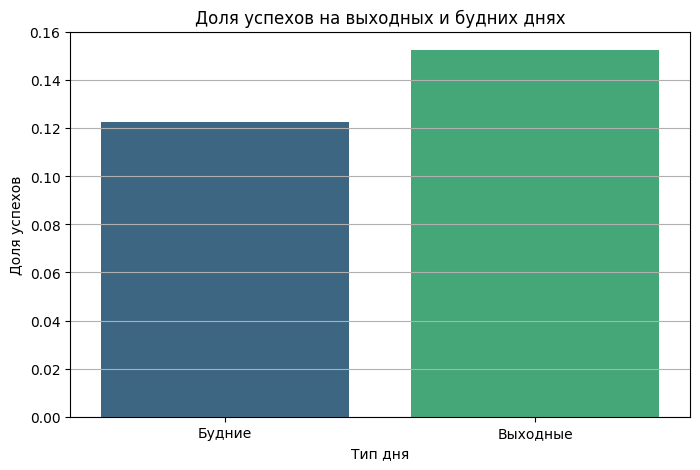

In [49]:
success_rate = df.groupby('is_holiday')['flag_call_result'].mean().reset_index()
success_rate['is_holiday'] = success_rate['is_holiday'].map({0: 'Будние', 1: 'Выходные'})
success_rate.columns = ['is_holiday', 'success_rate']

plt.figure(figsize=(8, 5))
sns.barplot(data=success_rate, x='is_holiday', y='success_rate', palette='viridis')
plt.title('Доля успехов на выходных и будних днях')
plt.xlabel('Тип дня')
plt.ylabel('Доля успехов')
plt.grid(axis='y')
plt.show()

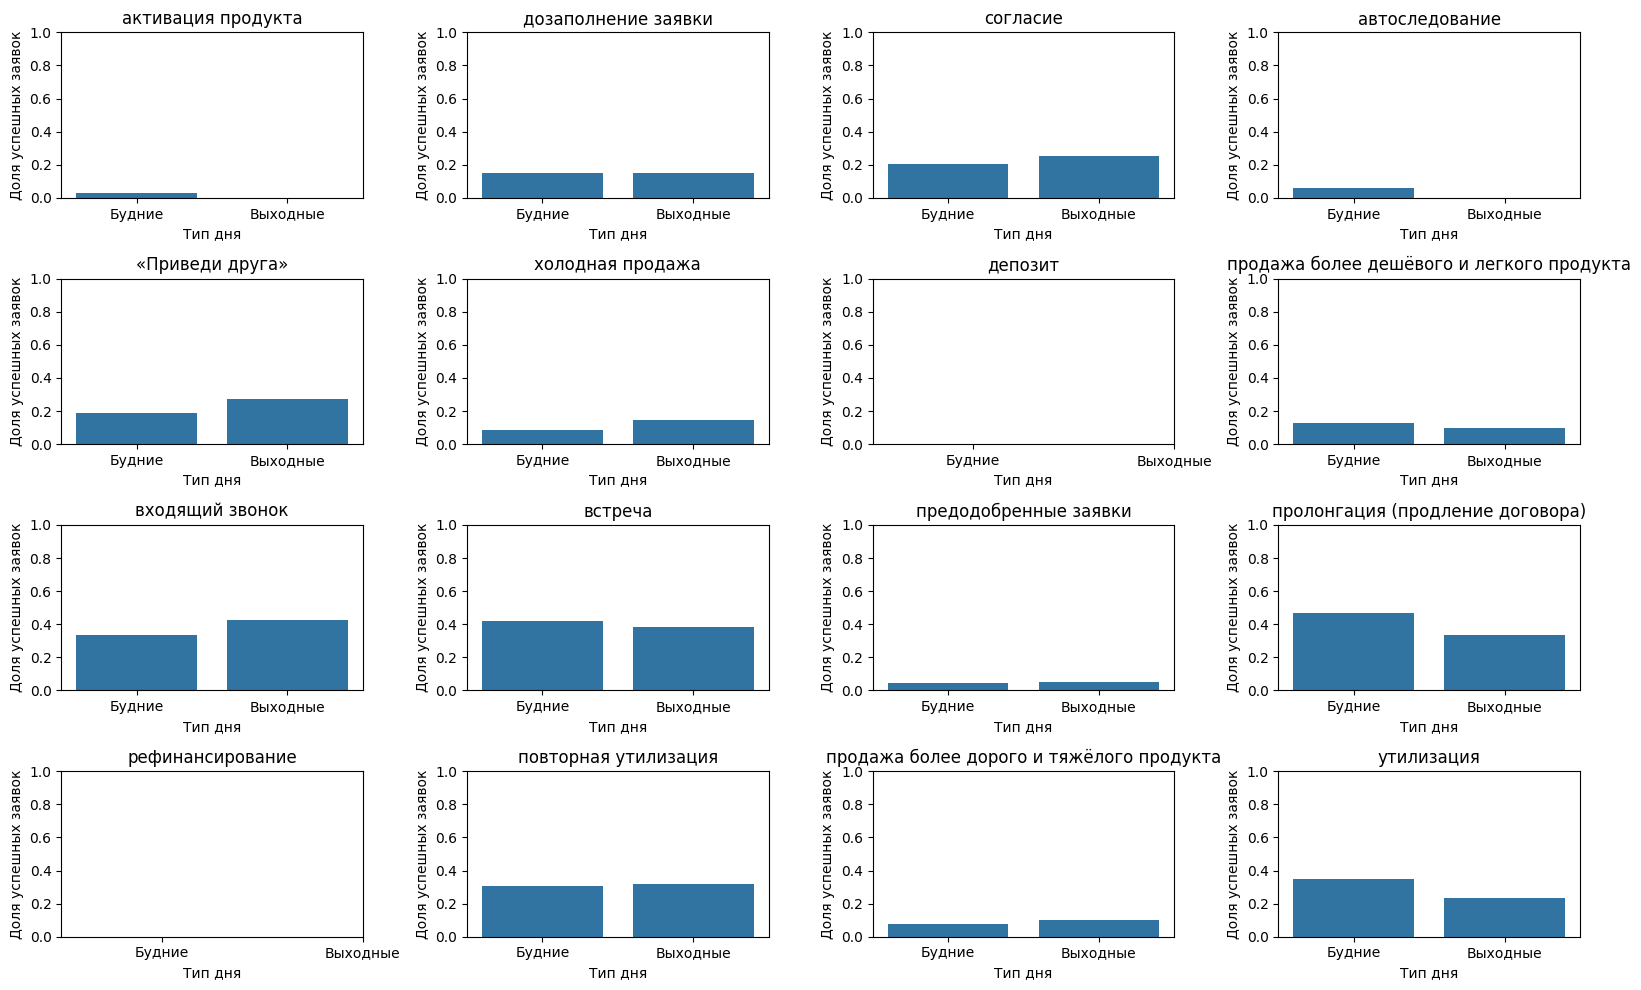

In [50]:
grouped = df.groupby(['is_holiday', 'functional_cd']).agg(
    total=('flag_call_result', 'size'),
    approved=('flag_call_result', lambda x: (x == 1).sum())
).reset_index()

grouped['approved_ratio'] = grouped['approved'] / grouped['total']

functional_codes = grouped['functional_cd'].unique()

plt.figure(figsize=(16, 10))

num_plots = len(functional_codes)
cols = 4
rows = (num_plots + cols - 1) // cols

for i, functional_code in enumerate(functional_codes):
    plt.subplot(rows, cols, i + 1)
    
    subset = grouped[grouped['functional_cd'] == functional_code]
    
    sns.barplot(x='is_holiday', y='approved_ratio', data=subset)
    
    plt.title(translations[functional_code])
    plt.xlabel('Тип дня')
    plt.ylabel('Доля успешных заявок')
    plt.xticks(ticks=[0, 1], labels=['Будние', 'Выходные'])
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

In [51]:
df['bundle_nm'] = df['bundle_nm'].fillna('XXX')

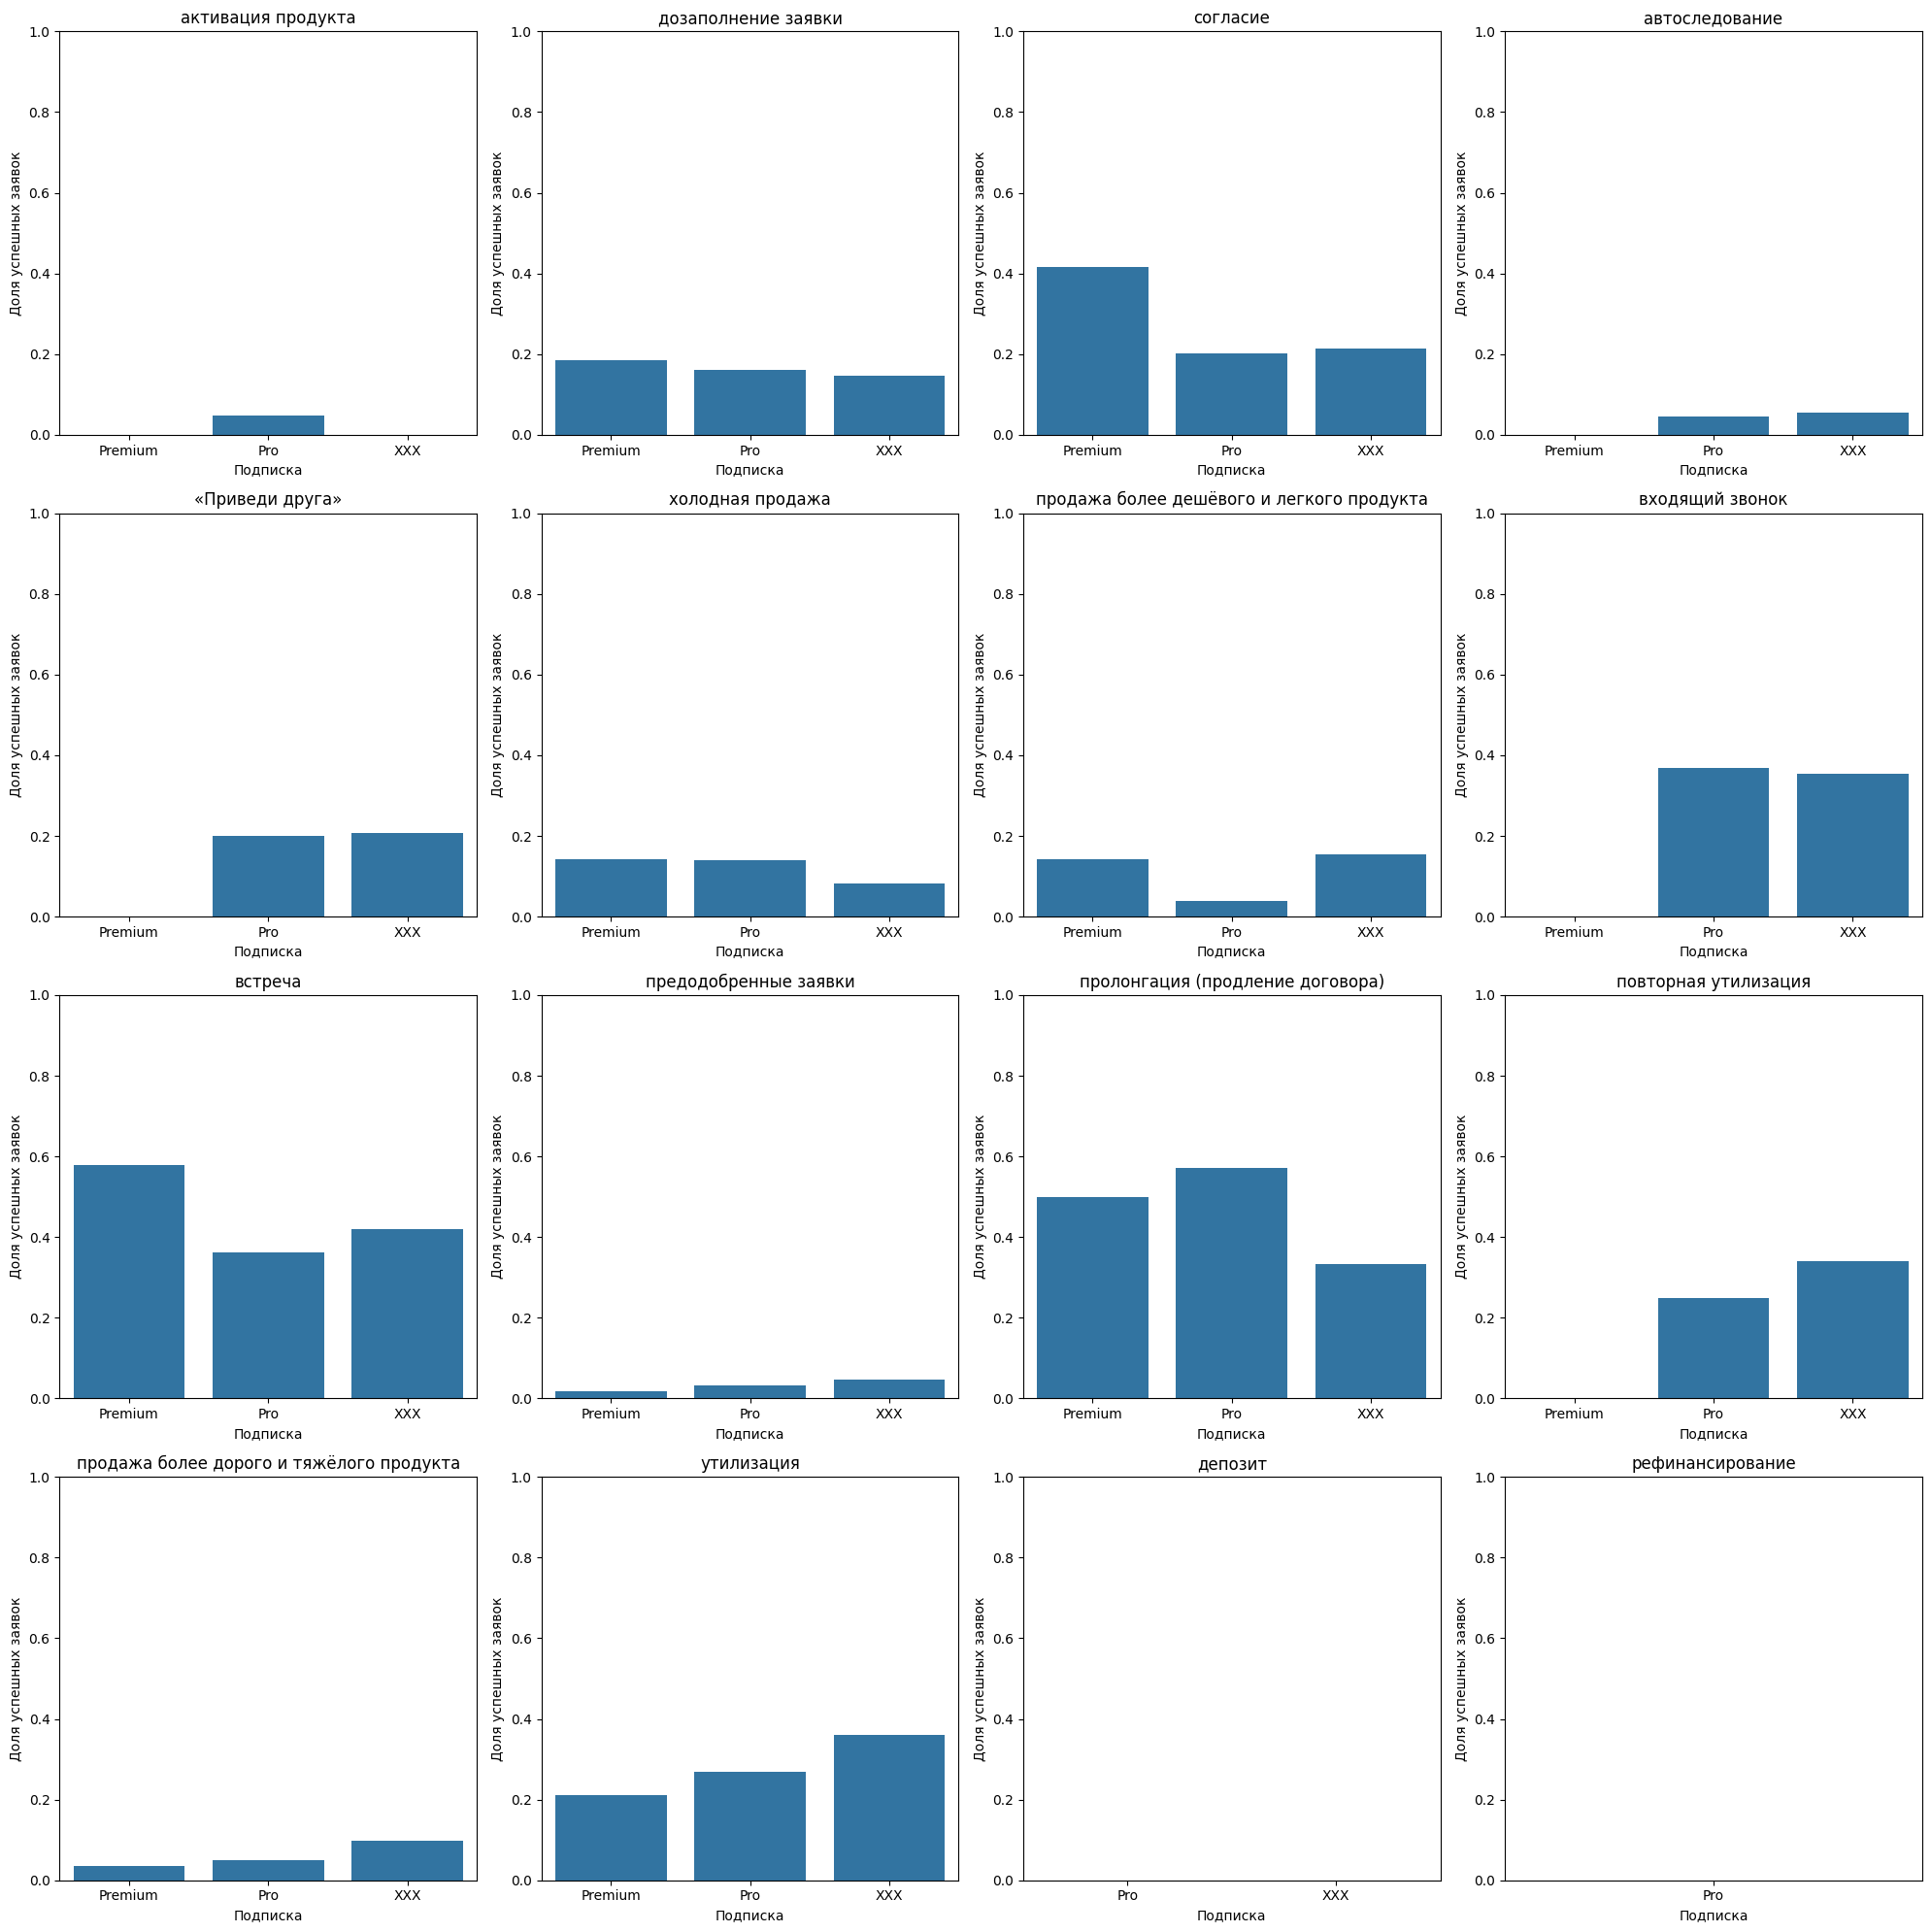

In [52]:
grouped = df.groupby(['bundle_nm', 'functional_cd']).agg(
    total=('flag_call_result', 'size'),
    approved=('flag_call_result', lambda x: (x == 1).sum())
).reset_index()

grouped['approved_ratio'] = grouped['approved'] / grouped['total']
functional_codes = grouped['functional_cd'].unique()


num_plots = len(functional_codes)
cols = 4
rows = (num_plots + cols - 1) // cols

plt.figure(figsize=(20, rows * 5))


for i, functional_code in enumerate(functional_codes):
    plt.subplot(rows, cols, i + 1)
    
    data_subset = grouped[grouped['functional_cd'] == functional_code]
    
    sns.barplot(x='bundle_nm', y='approved_ratio', data=data_subset)
    
    plt.title(translations[functional_code])
    plt.xlabel('Подписка')
    plt.ylabel('Доля успешных заявок')
    plt.ylim(0, 1) 

plt.tight_layout()
plt.show()

In [53]:
with open('unique_reasons.txt', 'w') as file:
    for el in df['wo_hit_status_reason_desc'].unique():
        file.write(f"{el}\n")  # Записываем каждое значение в новую строку

print("Уникальные значения записаны в файл 'unique_reasons.txt'")

Уникальные значения записаны в файл 'unique_reasons.txt'


In [61]:
df['is_negative'] = df['wo_hit_status_reason_desc'].apply(lambda x: 1 if x in [
    "Перезвонит самостоятельно позднее",
    "Назначена встреча",
    "Готов использовать карту",
    "Успешно информирован, не совершил сделку в звонке",
    "Полная заявка",
    "Успешно утилизирован",
    "Воспользуется при необходимости",
    "Готов использовать карту. Экстра-оффер",
    "Готов использовать карту. 500 баллов за покупку от 500 руб",
    "Готов использовать карту. Рассрочка на 1 покупку от 600 руб"
] else 0)

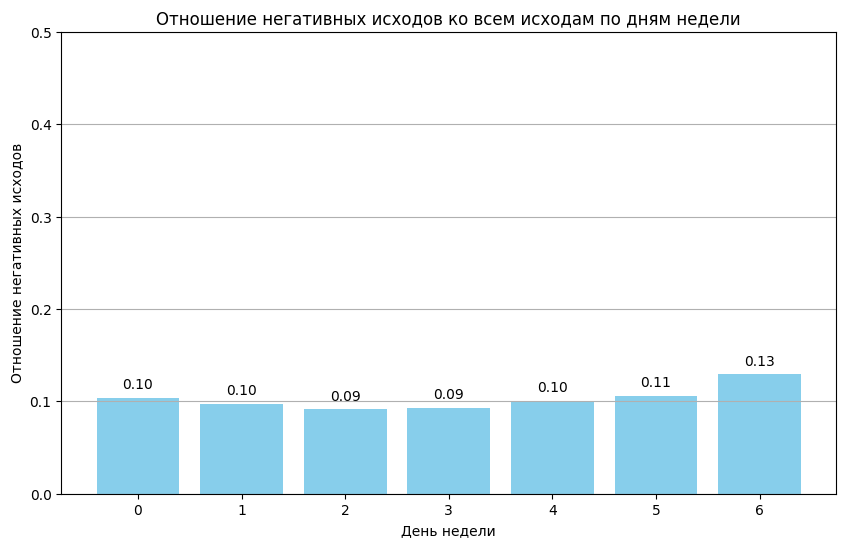

In [62]:
summary = df.groupby('day_of_week').agg(
    total=('is_negative', 'count'),
    negative=('is_negative', 'sum')
).reset_index()

# Вычисление отношения негативных исходов к общему количеству
summary['negative_ratio'] = summary['negative'] / summary['total']

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(summary['day_of_week'], summary['negative_ratio'], color='skyblue')
plt.xlabel('День недели')
plt.ylabel('Отношение негативных исходов')
plt.title('Отношение негативных исходов ко всем исходам по дням недели')
plt.ylim(0, 0.5)  # Устанавливаем пределы по оси Y от 0 до 1 # Линия для визуализации порога
plt.grid(axis='y')

# Показать значения над столбцами
for index, value in enumerate(summary['negative_ratio']):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center')

plt.show()

In [63]:
summary = df.groupby('day_of_week').agg(
    total=('flag_call_result', 'count'),
    negative=('flag_call_result', 'sum')
).reset_index()

# Вычисление отношения негативных исходов к общему количеству
summary['negative_ratio'] = summary['flag_call_result'] / summary['total']

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(summary['day_of_week'], summary['flag_call_result'], color='skyblue')
plt.xlabel('День недели')
plt.ylabel('Отношение негативных исходов')
plt.title('Отношение негативных исходов ко всем исходам по дням недели')
plt.ylim(0, 0.5)  # Устанавливаем пределы по оси Y от 0 до 1 # Линия для визуализации порога
plt.grid(axis='y')

# Показать значения над столбцами
for index, value in enumerate(summary['flag_call_result']):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center')

plt.show()

KeyError: 'flag_call_result'

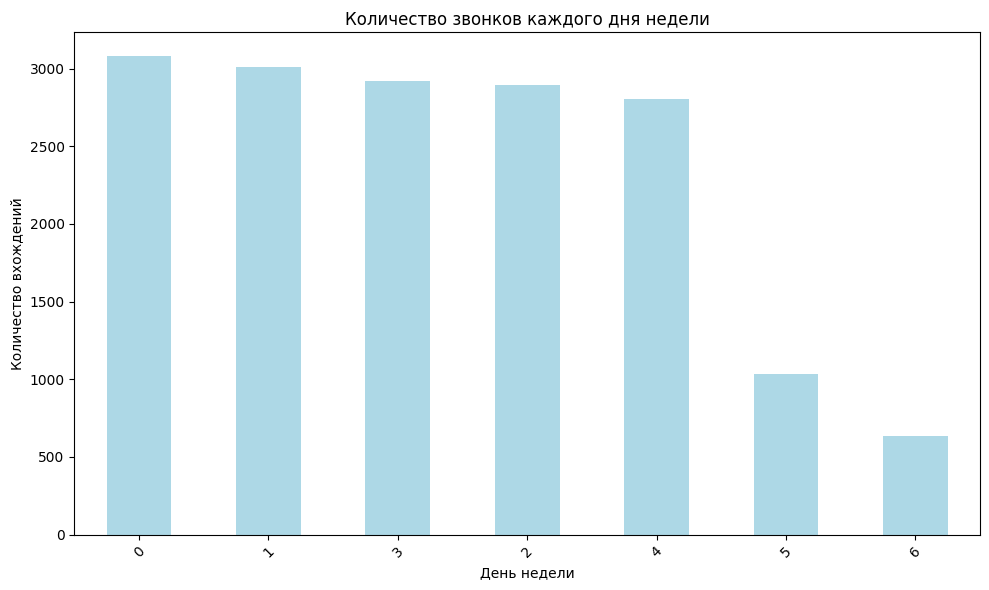

In [66]:
day_counts = df['day_of_week'].value_counts()

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar', color='lightblue')
plt.title('Количество звонков каждого дня недели')
plt.xlabel('День недели')
plt.ylabel('Количество вхождений')
plt.xticks(rotation=45)
plt.tight_layout()

# Сохранение графика в файл PNG
plt.savefig('day_of_week_counts.png')
plt.show()

<Axes: >

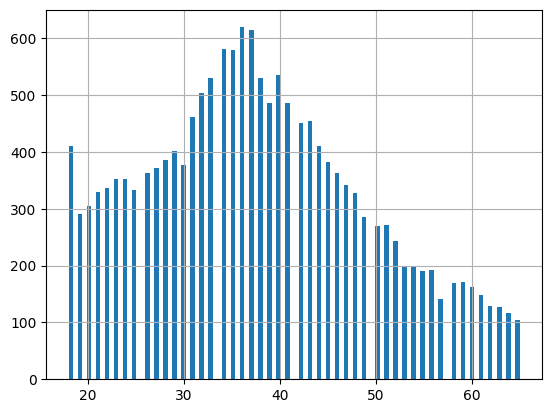

In [69]:
df['age'].hist(bins=100)

In [87]:
df['product_cd'].unique()

array(['Debit Cards', 'Cash Loan', 'MVNO', 'Investment',
       'Mortgage Insurance', 'Credit Cards', 'Casco', 'Secured Loan',
       'Car Loan', 'Osago', 'Deposit', 'Travel Avia', 'T-Auto'],
      dtype=object)

In [16]:
df = df.dropna(subset=['segment_cd'])

In [17]:
df['segment_cd']

1         r_01 (6)
2        t_05 (19)
4        t_07 (29)
5        t_10 (40)
7        u_04 (14)
           ...    
15776    r_03 (20)
15777    t_11 (42)
15779     t_02 (8)
15781    m_09 (25)
15782     u_01 (3)
Name: segment_cd, Length: 9554, dtype: object

In [18]:
df['segment_cd'].unique()

array(['r_01 (6)', 't_05 (19)', 't_07 (29)', 't_10 (40)', 'u_04 (14)',
       'u_01 (3)', 'm_07 (18)', 't_09 (36)', 'u_11 (39)', 't_01 (4)',
       't_06 (28)', 'm_02 (2)', 'm_03 (9)', 'm_04 (11)', 'r_07 (37)',
       'r_02 (7)', 'm_08 (21)', 'u_02 (5)', 't_12 (44)', 'u_10 (35)',
       'm_05 (12)', 't_02 (8)', 't_04 (16)', 'm_09 (25)', 'r_04 (22)',
       'r_08 (38)', 'u_05 (17)', 'm_06 (15)', 't_03 (10)', 'u_03 (13)',
       'u_06 (23)', 'r_03 (20)', 'm_11 (34)', 'm_10 (26)', 'u_07 (27)',
       'u_08 (31)', 'm_01 (1)', 't_08 (30)', 't_11 (42)', 'r_10 (45)',
       'u_09 (32)', 'u_12 (43)', 'r_06 (33)', 'r_05 (24)', 'r_09 (41)'],
      dtype=object)

In [22]:
df['xx'] = df['segment_cd'].apply(lambda x: int(x[2:4]))

C:\Users\valer\AppData\Local\Temp\ipykernel_23736\2825280469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xx'] = df['segment_cd'].apply(lambda x: int(x[2:4]))


In [23]:
df

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,day_of_week,is_holiday,approval_flg,bundle_flg,region_size_numeric,xx
1,348648289,44.0,1.0,rural,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,2,RUS,NaN,2,0,0,1.0,4.0,1
2,345496995,23.0,0.0,town,0.0,0.0,1.0,0.0,1.0,0.0,...,NaN,6,NaN,NaN,4,0,1,0.0,1.0,5
4,64946855,31.0,1.0,town,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,6,RUS,UNM,4,0,0,NaN,1.0,7
5,516320897,34.0,0.0,town,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,1,RUS,NaN,5,1,0,NaN,1.0,10
7,67061355,41.0,0.0,urban,0.0,1.0,1.0,0.0,1.0,1.0,...,NaN,7,NaN,NaN,0,0,0,NaN,2.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15776,65474670,47.0,1.0,rural,0.0,0.0,1.0,0.0,1.0,1.0,...,NaN,8,NaN,NaN,3,0,0,NaN,4.0,3
15777,429467475,58.0,0.0,town,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,11,NaN,NaN,3,0,0,NaN,1.0,11
15779,374791483,31.0,0.0,town,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,2,NaN,NaN,1,0,0,1.0,1.0,2
15781,305526568,58.0,0.0,msk,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,6,NaN,NaN,4,0,0,NaN,3.0,9


<Axes: >

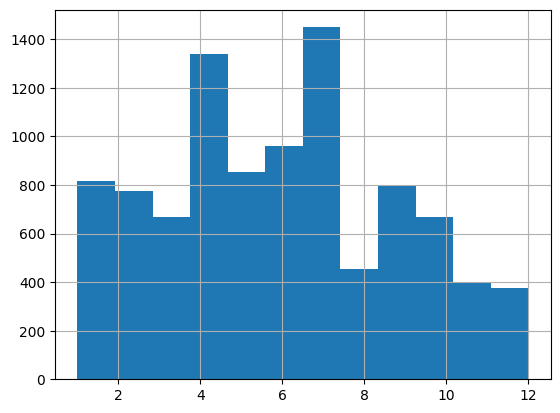

In [27]:
df['xx'].hist(bins=12)

In [28]:
df_invest = df[df['product_cd'] == 'Investment']

<Axes: >

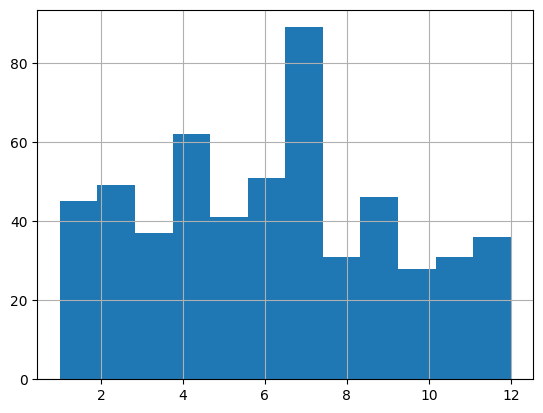

In [29]:
df_invest['xx'].hist(bins=12)

In [30]:
df_invest_1 = df[(df['product_cd'] == 'Investment') & (df['flag_call_result'] == 1)]

KeyError: 'flag_call_result'

In [31]:
df

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,day_of_week,is_holiday,approval_flg,bundle_flg,region_size_numeric,xx
1,348648289,44.0,1.0,rural,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,2,RUS,NaN,2,0,0,1.0,4.0,1
2,345496995,23.0,0.0,town,0.0,0.0,1.0,0.0,1.0,0.0,...,NaN,6,NaN,NaN,4,0,1,0.0,1.0,5
4,64946855,31.0,1.0,town,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,6,RUS,UNM,4,0,0,NaN,1.0,7
5,516320897,34.0,0.0,town,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,1,RUS,NaN,5,1,0,NaN,1.0,10
7,67061355,41.0,0.0,urban,0.0,1.0,1.0,0.0,1.0,1.0,...,NaN,7,NaN,NaN,0,0,0,NaN,2.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15776,65474670,47.0,1.0,rural,0.0,0.0,1.0,0.0,1.0,1.0,...,NaN,8,NaN,NaN,3,0,0,NaN,4.0,3
15777,429467475,58.0,0.0,town,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,11,NaN,NaN,3,0,0,NaN,1.0,11
15779,374791483,31.0,0.0,town,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,2,NaN,NaN,1,0,0,1.0,1.0,2
15781,305526568,58.0,0.0,msk,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,6,NaN,NaN,4,0,0,NaN,3.0,9


In [33]:
df['bundle_nm'].value_counts()

bundle_nm
0          6145
Pro        3208
Premium     200
XXX           1
Name: count, dtype: int64

In [35]:
df = df[df['bundle_nm'] != 'Premium']

In [36]:
df['bundle'] = df['bundle_nm'].apply(lambda x: 1 if x == 'Pro' else 0)

C:\Users\valer\AppData\Local\Temp\ipykernel_23736\539083811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bundle'] = df['bundle_nm'].apply(lambda x: 1 if x == 'Pro' else 0)


C:\Users\valer\AppData\Local\Temp\ipykernel_23736\3929433212.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_rate, x='bundle', y='success_rate', palette='viridis')


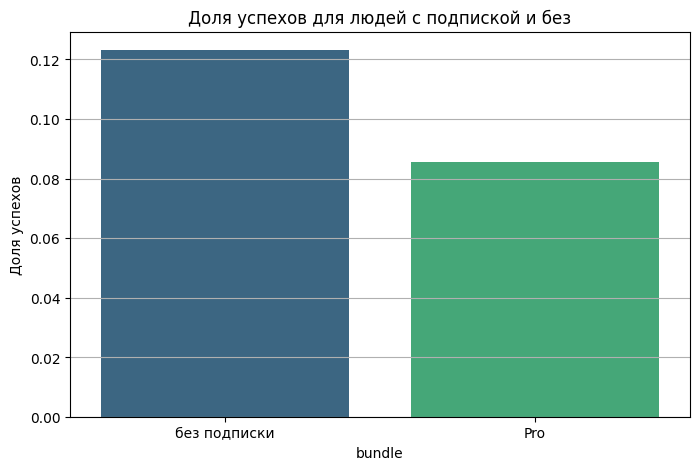

In [41]:
success_rate = df.groupby('bundle')['flag_call_result'].mean().reset_index()
success_rate['bundle'] = success_rate['bundle'].map({0: 'без подписки', 1: 'Pro'})
success_rate.columns = ['bundle', 'success_rate']

plt.figure(figsize=(8, 5))
sns.barplot(data=success_rate, x='bundle', y='success_rate', palette='viridis')
plt.title('Доля успехов для людей с подпиской и без')
plt.ylabel('Доля успехов')
plt.grid(axis='y')
plt.show()

In [43]:
df['bundle'].groupby(by=df['product_cd']).count()

product_cd
Car Loan               142
Casco                  192
Cash Loan             1703
Credit Cards          4535
Debit Cards            555
Deposit                  9
Investment             533
MVNO                  1191
Mortgage Insurance     179
Osago                    4
Secured Loan           306
T-Auto                   2
Travel Avia              3
Name: bundle, dtype: int64

In [44]:
pivot_table = df.pivot_table(index='product_cd', 
                              columns='bundle', 
                              aggfunc='size', 
                              fill_value=0)

# Добавление столбца "Итого"
pivot_table['Итого'] = pivot_table.sum(axis=1)

# Печать результата
print(pivot_table)


bundle                 0     1  Итого
product_cd                           
Car Loan              85    57    142
Casco                 85   107    192
Cash Loan            980   723   1703
Credit Cards        3232  1303   4535
Debit Cards          461    94    555
Deposit                8     1      9
Investment           324   209    533
MVNO                 690   501   1191
Mortgage Insurance   110    69    179
Osago                  3     1      4
Secured Loan         166   140    306
T-Auto                 2     0      2
Travel Avia            0     3      3
